<a href="https://colab.research.google.com/github/mairabermeo/Data-Science/blob/master/M_Bermeo%26J_Lily_Proj2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Predictive Modeling to Study the Impact of Sleep Habits on GPA**

By: Maira Bermeo, Jannat Lily

## Abstract

This project explores the impact of sleep patterns on academic performance among first-year college students.
Using data collected from Fitbit devices worn by students at Carnegie Mellon University, the University of
Washington, and the University of Notre Dame, we investigate how total sleep time, bedtime variability, and
daytime sleep relate to term GPA. We use exploratory data analysis (EDA) and multiple regression models to
uncover trends and predictors of academic success. The dataset consists of 634 students with both sleep and
academic data, along with demographic variables. Our findings suggest that consistent sleep patterns are
positively associated with GPA, and that irregular sleep may hinder academic performance. The results can help
inform sleep hygiene recommendations and intervention strategies for first-year college students.


## Introduction

Academic success in the first year of college is a key determinant of student retention and long-term outcomes.
While universities offer various support services to boost performance, students' own lifestyle habits, such as
sleep, play a significant role. Poor sleep habits are common among college students and are known to impair
cognitive functioning. This study aims to examine the relationship between objectively measured sleep
behaviors and term GPA among first-year students.

The data comes from the CMU Sleep Study, available publicly on GitHub, and includes Fitbit-recorded sleep
metrics for 634 students from CMU, UW, and ND. It also includes demographic information and GPA data. Our
approach includes exploratory data analysis, regression modeling, and feature engineering to understand
whether specific sleep metrics can predict academic performance.

Here is a more concise version of your variable descriptions, reworded for clarity and brevity without copying the original text directly. You can include this in your notebook as a reference table or section:

### **Variable Descriptions:**

| **Variable**            | **Description**                                             | **Observed Range** | **Normal / Expected Range**                                |
| ----------------------- | ----------------------------------------------------------- | ------------------ | ---------------------------------------------------------- |
| subject_id            | Unique student ID                                           | 1 – 99,978         | N/A (identifier)                                           |
| study                 | University site number                                      | 1 – 5              | N/A (categorical label)                                    |
| cohort                | Student cohort group (e.g., semester/year)                  | 5 unique labels    | N/A                                                        |
| demo_race             | Race group (0 = underrepresented, 1 = non-underrepresented) | 0 or 1             | Binary; no "normal" — used for subgroup analysis           |
| demo_gender           | Gender (0 = male, 1 = female)                               | 0 or 1             | Binary; no “normal”                                        |
| demo_firstgen         | First-gen college student (1 = yes, 0 = no)                 | 0 or 1             | Binary; no “normal”                                        |
| bedtime_mssd          | Bedtime inconsistency in hours (squared mean change)        | 0.004 – 20.85      | **≤1.0 hr** = regular; >1.5 hr = **irregular**             |
| TotalSleepTime        | Avg. main sleep duration (min/night)                        | 195 – 588          | **420–480 min** (7–8 hrs) = ideal for young adults         |
| midpoint_sleep        | Midpoint between sleep start & wake (min after 11 PM)       | 247 – 725          | **240–360 min** (3:00 AM – 5:00 AM midpoint)               |
| frac_nights_with_data | Fraction of nights with valid sleep data                    | 0.21 – 1.0         | **>0.80 (80%)** = good compliance                          |
| daytime_sleep         | Avg. daytime (napping) sleep in minutes                     | 2 – 292            | **0–60 min** = typical; >90 = potential compensatory sleep |
| cum_gpa               | Cumulative GPA (pre-spring)                                 | 1.21 – 4.00        | **3.0 – 4.0** = typical good standing                      |
| term_gpa              | GPA during spring term                                      | 0.35 – 4.00        | **3.0 – 4.0** = typical; <2.0 = academic concern           |
| term_units            | Course load in units (note: object type)                    | \~41 unique values | **12–18 units** = full-time load                           |
| Zterm_units_ZofZ      | Z-score of course load (standardized across cohort/school)  | \~-2.0 to 4.1      | **-1 to +1** = normal load; >2 = unusually high            |



### Research Approach

Our research followed a structured and thorough data science pipeline from acquisition to modeling:

* **Data Acquisition**: We loaded the dataset from GitHub using pandas and inspected its structure using .head(), .info(), and .describe() to understand the contents.

* **Data Cleaning**: We converted columns with numeric values stored as objects into proper numeric format using pd.to_numeric(). Categorical variables like gender, race, and first-generation status were encoded numerically. We addressed missing values using forward fill, median, and KNN imputation strategies, and selected the most accurate based on distributional comparison. Additionally, some values that were originally zeros did not convert properly and became NaN; we manually corrected those.

* **Exploratory Data Analysis (EDA)**: We used visualizations such as pairplots, scatterplots, histograms, boxplots, and correlation heatmaps to explore the relationships between sleep metrics and academic performance. GPA was binned into categories for visual comparisons. We identified patterns like higher TotalSleepTime being associated with higher GPA, and late or irregular sleep patterns being negatively associated with GPA.

* **Data Preparation**: We handled outliers based on IQR and standard deviation analysis, and standardized all numeric variables. We dropped redundant columns such as study, cohort, cum\_gpa, and term\_units to reduce multicollinearity and improve model clarity. We verified this with Variance Inflation Factor (VIF) analysis, where all VIF values remained below 2, confirming no serious multicollinearity.

* **Prepped Data Review**: We regenerated plots on the cleaned data to verify integrity, confirmed there were no remaining missing values, and ensured all variables were correctly typed for modeling. Pairplots, updated boxplots, and distribution histograms confirmed that visual trends were preserved post-cleaning.

* **Investigative Analysis and Results**: We trained multiple regression models including Linear Regression, KNN Regressor, Huber Regressor, Quantile Regression, Random Forest, and Gradient Boosting. We evaluated model performance using RMSE, MAE, and Pinball Loss (for quantile regression). For tree-based models, we visualized feature importance to understand which sleep or demographic factors best predicted term GPA.


**Tools used**: pandas, numpy, seaborn, matplotlib, scikit-learn, statsmodels.

## Data Acquisition

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/mairabermeo/Data-Science/master/Data/cmu-sleep.csv'
df = pd.read_csv(url)
df.head()

subject_id  study cohort demo_race demo_gender demo_firstgen  bedtime_mssd  \
0         185      5   lac1         1           1             0      0.116727   
1         158      5   lac1         0           1             0      0.141681   
2         209      5   lac1         1           1             0      1.529289   
3         102      5   lac1         0           1             1      0.130148   
4         174      5   lac1         1           1             0      0.130181   

   TotalSleepTime  midpoint_sleep  frac_nights_with_data  daytime_sleep  \
0      432.200000      458.660000               0.862069      24.160000   
1      391.931035      364.465517               1.000000      13.137931   
2      344.304348      560.891304               0.793103      14.956522   
3      392.620690      416.482759               1.000000      54.551724   
4      423.421053      368.763158               0.655172      10.526316   

   cum_gpa  term_gpa term_units Zterm_units_ZofZ  
0     3.00      3.38         73      4.055294859  
1     3.66      2.60         64      2.482534122  
2     3.57      3.07         63       2.30778293  
3     3.61      3.56         61      1.958280544  
4     3.21      4.00         61      1.958280544

In [ ]:
print("Data Shape:", df.shape)

Data Shape: (634, 15)


In [ ]:
df.describe()

subject_id       study  bedtime_mssd  TotalSleepTime  midpoint_sleep  \
count    634.000000  634.000000    634.000000      634.000000      634.000000   
mean   13005.892744    3.181388      0.451688      397.323874      398.679186   
std    26496.593477    1.317125      1.393632       50.856725       72.710945   
min        1.000000    1.000000      0.004505      194.782609      247.071429   
25%      178.000000    2.000000      0.074694      366.930077      345.182692   
50%      358.500000    3.000000      0.135007      400.395833      388.245726   
75%      592.750000    4.000000      0.291698      430.114583      437.655263   
max    99978.000000    5.000000     20.849225      587.666667      724.666667   

       frac_nights_with_data  daytime_sleep     cum_gpa    term_gpa  
count             634.000000     634.000000  634.000000  634.000000  
mean                0.867439      41.164241    3.465596    3.449598  
std                 0.178960      27.389418    0.437577    0.500467  
min                 0.214286       2.269231    1.210000    0.350000  
25%                 0.821429      23.097826    3.232283    3.233333  
50%                 0.932184      34.982143    3.557833    3.555667  
75%                 1.000000      51.248538    3.789545    3.810000  
max                 1.000000     292.304348    4.000000    4.000000

### Descriptive Statistics:

* The dataset contains 634 students with consistent data across all 15 variables.
* Average sleep duration is about 6.6 hours per night, with many students getting less than the recommended 7–9 hours.
* Bedtime variability is generally low, but some students show very irregular sleep patterns.
* The average midpoint of sleep is around 3:40 AM, suggesting many students go to bed late.
* Students nap for an average of 41 minutes daily, though some nap up to 5 hours.
* GPA averages** are around 3.45, but range from very low (0.35) to perfect (4.0).
* Most students have sleep data for over 80% of nights, indicating high data reliability.

In [ ]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 subject_id               0
study                    0
cohort                   0
demo_race                0
demo_gender              0
demo_firstgen            0
bedtime_mssd             0
TotalSleepTime           0
midpoint_sleep           0
frac_nights_with_data    0
daytime_sleep            0
cum_gpa                  0
term_gpa                 0
term_units               0
Zterm_units_ZofZ         0
dtype: int64


In [ ]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   subject_id             634 non-null    int64  
 1   study                  634 non-null    int64  
 2   cohort                 634 non-null    object 
 3   demo_race              634 non-null    object 
 4   demo_gender            634 non-null    object 
 5   demo_firstgen          634 non-null    object 
 6   bedtime_mssd           634 non-null    float64
 7   TotalSleepTime         634 non-null    float64
 8   midpoint_sleep         634 non-null    float64
 9   frac_nights_with_data  634 non-null    float64
 10  daytime_sleep          634 non-null    float64
 11  cum_gpa                634 non-null    float64
 12  term_gpa               634 non-null    float64
 13  term_units             634 non-null    object 
 14  Zterm_units_ZofZ       634 non-null    object 
dtypes: flo

In [ ]:
zero_counts = (df == 0).sum()
print(zero_counts, "\n")

subject_id               0
study                    0
cohort                   0
demo_race                0
demo_gender              0
demo_firstgen            0
bedtime_mssd             0
TotalSleepTime           0
midpoint_sleep           0
frac_nights_with_data    0
daytime_sleep            0
cum_gpa                  0
term_gpa                 0
term_units               0
Zterm_units_ZofZ         0
dtype: int64 



### Observations

* The dataset contains 634 entries and 15 columns, including demographic, sleep, and academic performance variables.

* There are no missing values in the dataset, so no imputation is required.

* There are no zero values in any of the variables, indicating that the data does not include placeholder or corrupted entries.

* Most data types are appropriate; however, categorical variables except 'cohort' are stored as object types and may need conversion to numeric or categorical formats.

* Sleep-related variables show high variability, suggesting a wide range of sleep behaviors among students.

* Academic variables (cumulative GPA and term GPA) are more consistent across the sample, with averages around 3.5, but some students show significantly lower scores.


## EDA

### Correlation Heatmap Analysis:

* **TotalSleepTime and term\_gpa** have a small positive correlation (about 0.12). This suggests that students who sleep more at night tend to have slightly better GPAs, but the relationship is weak.

* **bedtime\_mssd and midpoint\_sleep** show a moderate positive correlation (0.41). This makes sense because inconsistent bedtimes often affect the midpoint of sleep.

* **midpoint\_sleep and TotalSleepTime** have a negative correlation (−0.33). This could mean that students who sleep later get less total sleep.

* **frac\_nights\_with\_data and bedtime\_mssd** have a negative correlation (−0.44). Students with more nights of data seem to have more consistent bedtimes.

* **daytime\_sleep and term\_gpa** have a negative correlation (−0.25). This may indicate that students who nap more during the day tend to have lower GPAs.

* **cum\_gpa and term\_gpa** are strongly positively correlated (0.64). This means past academic performance is a good predictor of current GPA.

* **term\_units and demo\_firstgen** have a negative correlation (−0.24). First-generation students may be taking slightly fewer units.

* **study and term\_gpa** show a moderate positive correlation (0.37). This could reflect differences in GPA by university or semester, which should be investigated further.

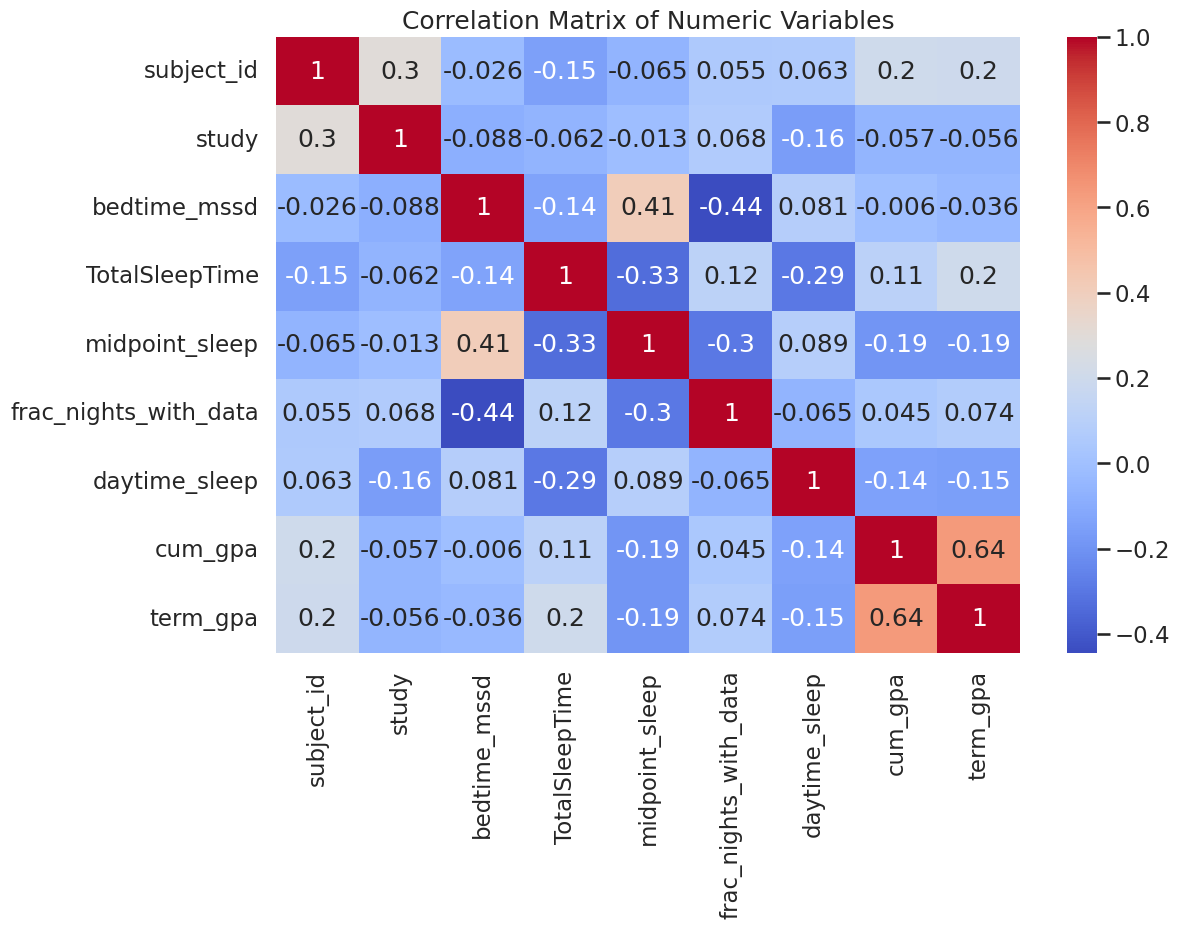

In [ ]:
# correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

### Pairplot Analysis

* **GPA Correlations**:

  * 'cum\_gpa' and 'term\_gpa' show a strong **positive linear correlation**, as expected. Students with high cumulative GPA tend to also perform well in the term when sleep data was recorded.
  * 'TotalSleepTime' appears to have a **slight positive association** with both 'cum\_gpa' and 'term\_gpa', suggesting that students who sleep more may perform better academically.
  * 'bedtime\_mssd' (bedtime inconsistency) shows a **slight negative trend** with GPA values, indicating that more irregular sleep could be linked to lower academic performance.

* **Sleep Behavior Relationships**:

  * 'bedtime\_mssd' and 'TotalSleepTime' show a **slight negative pattern**, suggesting that inconsistent sleep times might reduce total sleep duration.
  * 'midpoint\_sleep' and 'TotalSleepTime' have **no clear linear relationship**, but there's wide variability in midpoints for students with moderate to high sleep duration.
  * 'frac\_nights\_with\_data' is heavily skewed toward 1.0, showing that most students have complete or near-complete sleep data.

* **Distributions**:

  * 'TotalSleepTime', 'midpoint\_sleep', 'daytime\_sleep', and both GPA measures show approximately **normal or right-skewed** distributions.
  * 'bedtime\_mssd' is **highly right-skewed**, indicating that most students have low inconsistency, but a few have extremely erratic sleep patterns.
  * 'daytime\_sleep' is **positively skewed**, with many students reporting low napping and a few with high napping behavior.

* **Other Notes**:

  * 'subject\_id' is just an identifier and shows no meaningful relationship with any other variable.
  * 'study' shows vertical lines in scatter plots due to being a discrete categorical code (not useful for correlation-based visualization).


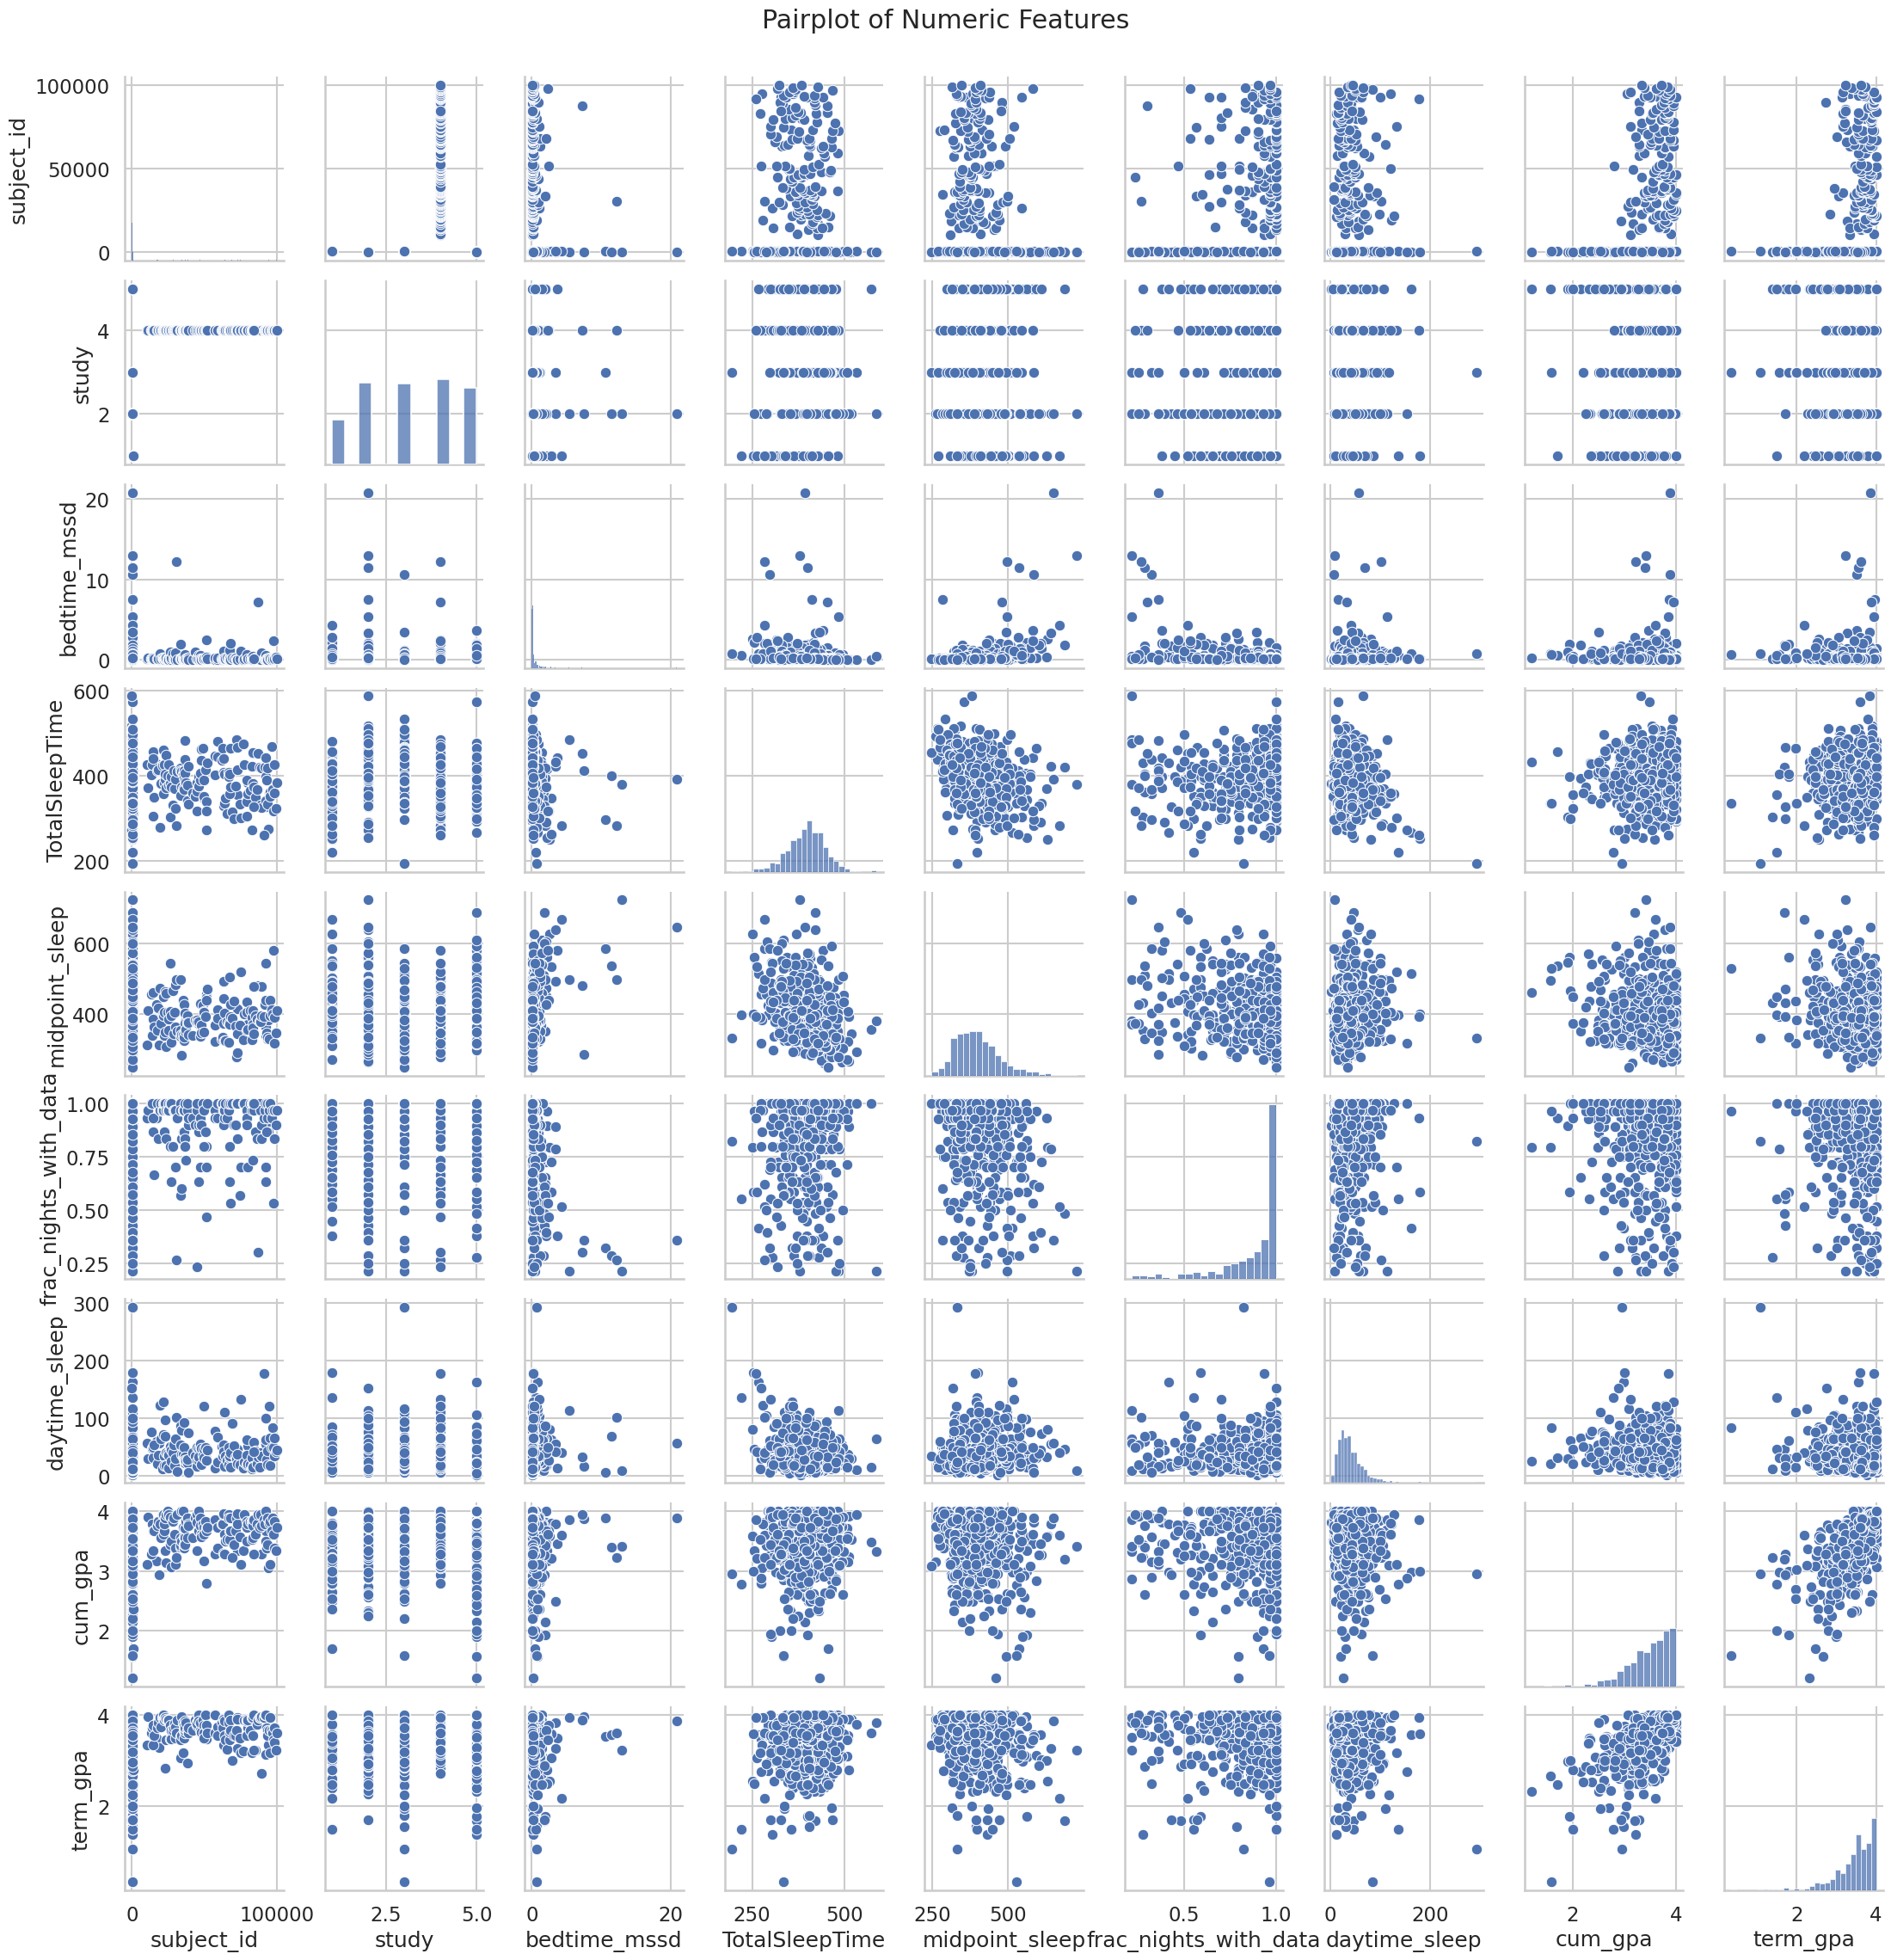

In [ ]:
# pairplot
data = df.select_dtypes(include='number').dropna()
sns.pairplot(data)
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

### Boxplot Analysis

* **Bedtime inconsistency** is higher among students with lower GPA, suggesting irregular sleep may hinder academic performance.
* **Total sleep time** increases slightly with GPA. Higher-performing students tend to sleep more and show less variation.
* **Midpoint of sleep** is later for low-GPA students, indicating they tend to sleep and wake later.
* **Fraction of nights with data** is lower and more variable in the lowest GPA group, possibly reflecting less routine or device use.
* **Daytime sleep** is higher for low-GPA students, suggesting compensatory napping for poor nighttime sleep.
* **Cumulative GPA** rises with term GPA as expected, confirming consistency between academic performance measures.

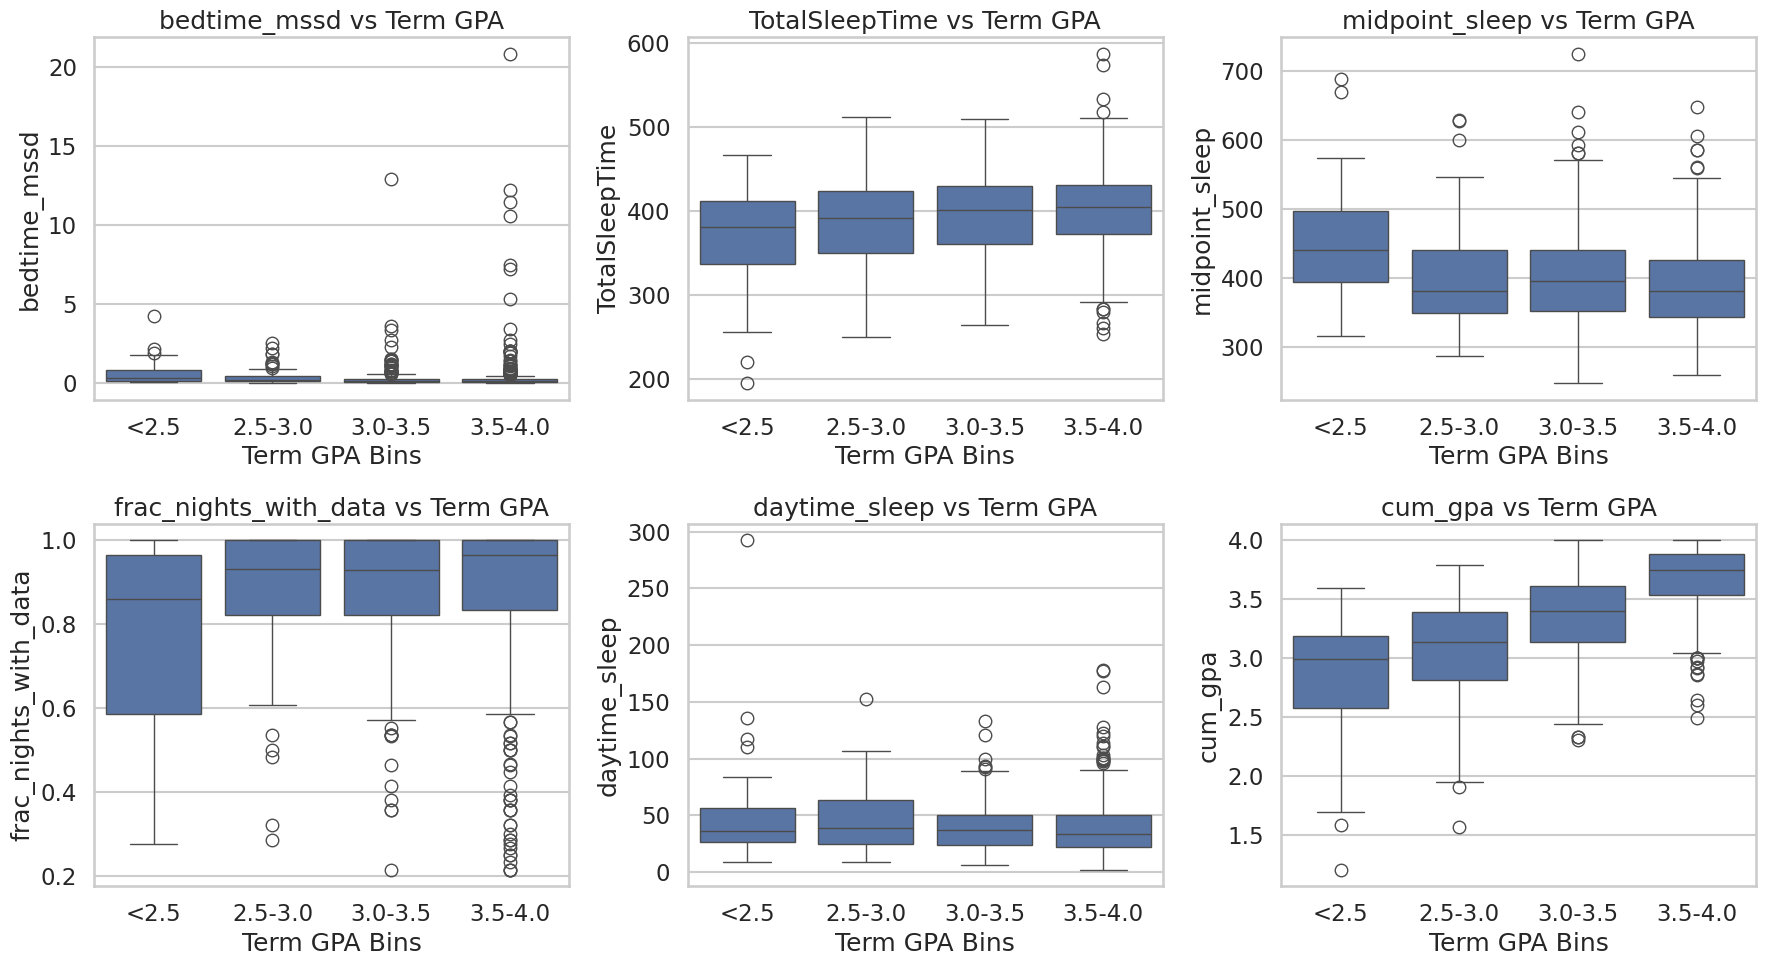

In [ ]:
# Box plot : Numeric columns vs Term GPA
df['term_gpa_bin'] = pd.cut(df['term_gpa'], bins=[0, 2.5, 3.0, 3.5, 4.0],
                            labels=['<2.5', '2.5-3.0', '3.0-3.5', '3.5-4.0'])

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = [col for col in numeric_cols if col not in ['subject_id', 'study', 'term_gpa']]


n_cols = 3
n_rows = -(-len(numeric_cols) // n_cols)

plt.figure(figsize=(18, n_rows * 5))

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(data=df, x='term_gpa_bin', y=col)
    plt.xlabel('Term GPA Bins')
    plt.ylabel(col)
    plt.title(f'{col} vs Term GPA')

plt.tight_layout()
plt.show()

### Scatter Plot Analysis

* **Bedtime inconsistency ('bedtime\_mssd')**: Most students maintain low variability in bedtime, but outliers with high inconsistency are concentrated among those with lower GPAs. This supports the idea that erratic sleep schedules may negatively impact academic performance.

* **Total sleep time ('TotalSleepTime')**: Students with higher GPAs generally average more sleep per night (around 400–450 minutes). The trend is subtle but suggests that longer sleep may contribute to better academic outcomes.

* **Midpoint of sleep ('midpoint\_sleep')**: Earlier midpoints (around 4–5 AM) are more common in students with higher GPA, while later sleep schedules tend to appear in lower-performing students, possibly reflecting poor sleep hygiene.

* **Fraction of nights with data ('frac\_nights\_with\_data')**: High-GPA students typically have nearly complete sleep data, while lower-GPA students show more variability. This may reflect inconsistencies in routines or lower engagement with tracking.

* **Daytime sleep ('daytime\_sleep')**: Excessive daytime sleep (e.g., >100 minutes) is mostly seen in low-GPA students, suggesting that disrupted nighttime sleep or fatigue may interfere with academic focus.

* **Cumulative GPA ('cum\_gpa')**: Strongly aligned with term GPA, validating the reliability of academic performance indicators. Students with high cumulative GPAs consistently perform well during the term studied.



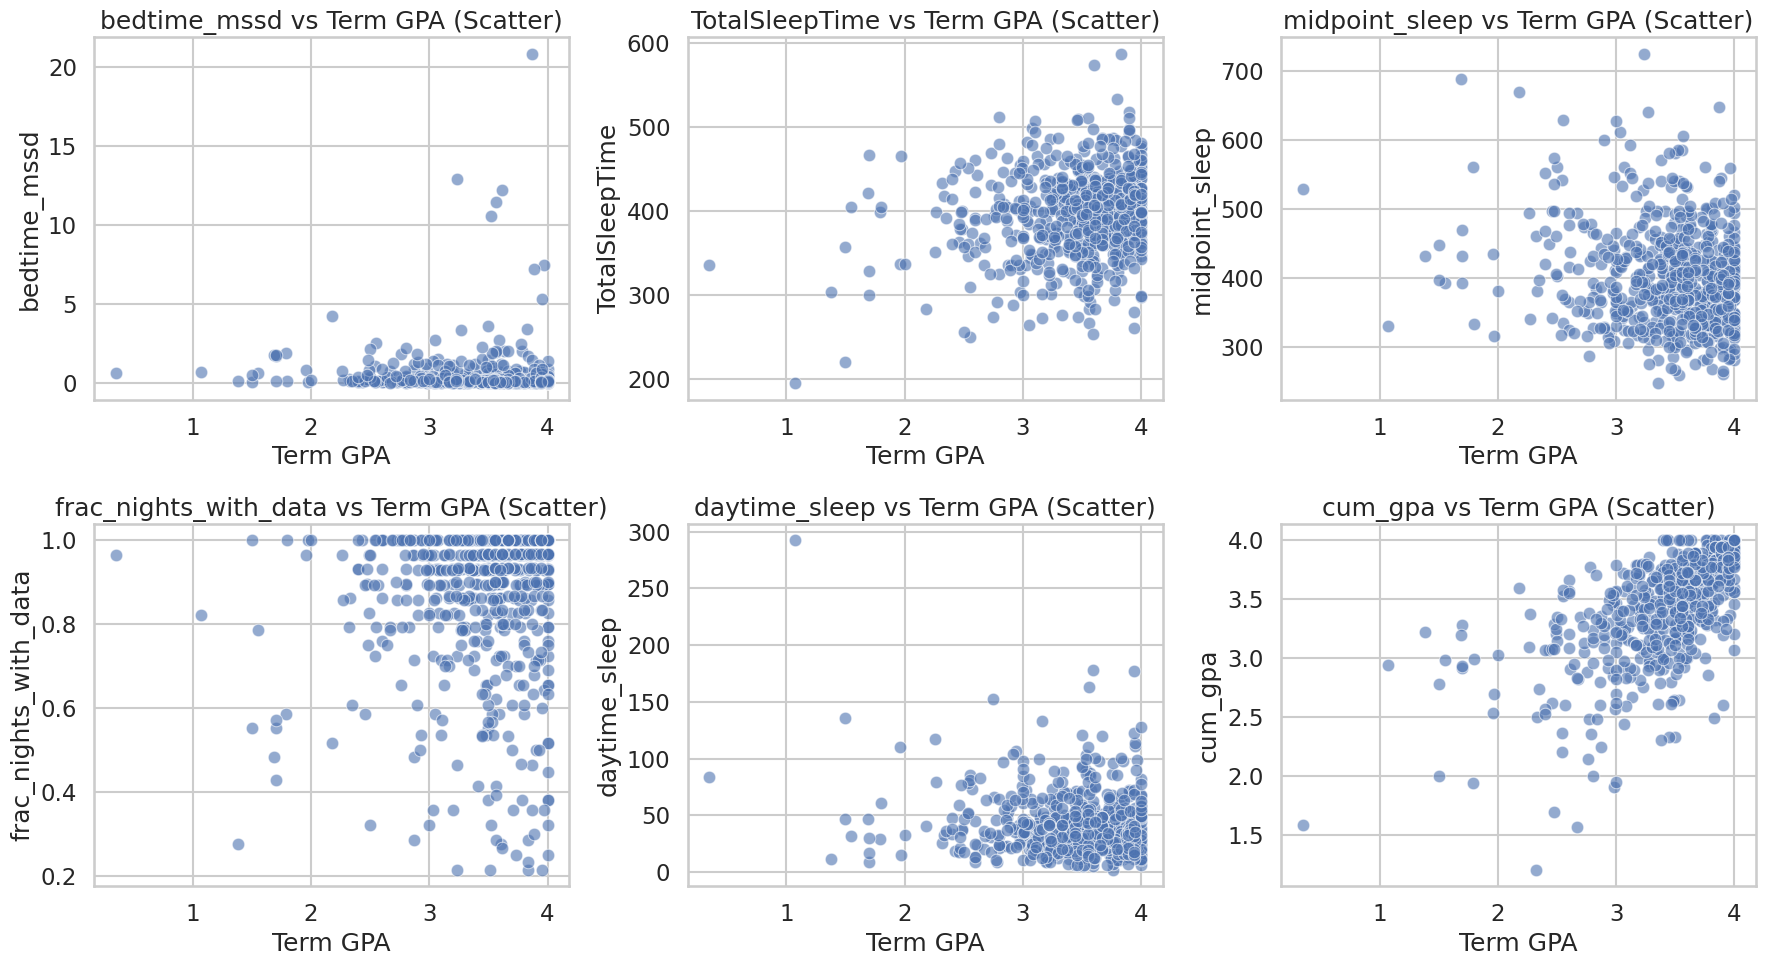

In [ ]:
# Scatter plots: Numeric columns vs Term GPA
plt.figure(figsize=(18, n_rows * 5))

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.scatterplot(data=df, x='term_gpa', y=col, alpha=0.6)
    plt.xlabel('Term GPA')
    plt.ylabel(col)
    plt.title(f'{col} vs Term GPA (Scatter)')

plt.tight_layout()
plt.show()

### Histogram Analysis

* **'bedtime\_mssd' (Bedtime inconsistency)**: Highly right-skewed. Most students have low inconsistency in bedtime, with a few extreme outliers. This suggests most students maintain a relatively stable bedtime routine.

* **'TotalSleepTime'**: Approximately normal distribution, centered around 400 minutes (\~6.7 hours). Most students fall within the recommended 6–8 hour sleep range.

* **'midpoint\_sleep'**: Slight right skew. Most midpoints occur between 350–450 minutes after 11 PM (around 5:00–6:30 AM), indicating late but relatively consistent sleep timing among students.

* **'frac\_nights\_with\_data'**: Right-skewed toward 1.0. Most students have near-complete data coverage, but a small number show gaps, indicating some inconsistency in device usage or data collection.

* **'daytime\_sleep'**: Strong right skew. Majority of students nap less than 60 minutes per day, though some report very high daytime sleep, which may indicate irregular nighttime sleep or sleep compensation.

* **'cum\_gpa' (Cumulative GPA)**: Left-skewed. Most students have relatively high GPAs (above 3.0), with fewer students in the lower range, suggesting a high-performing sample overall.

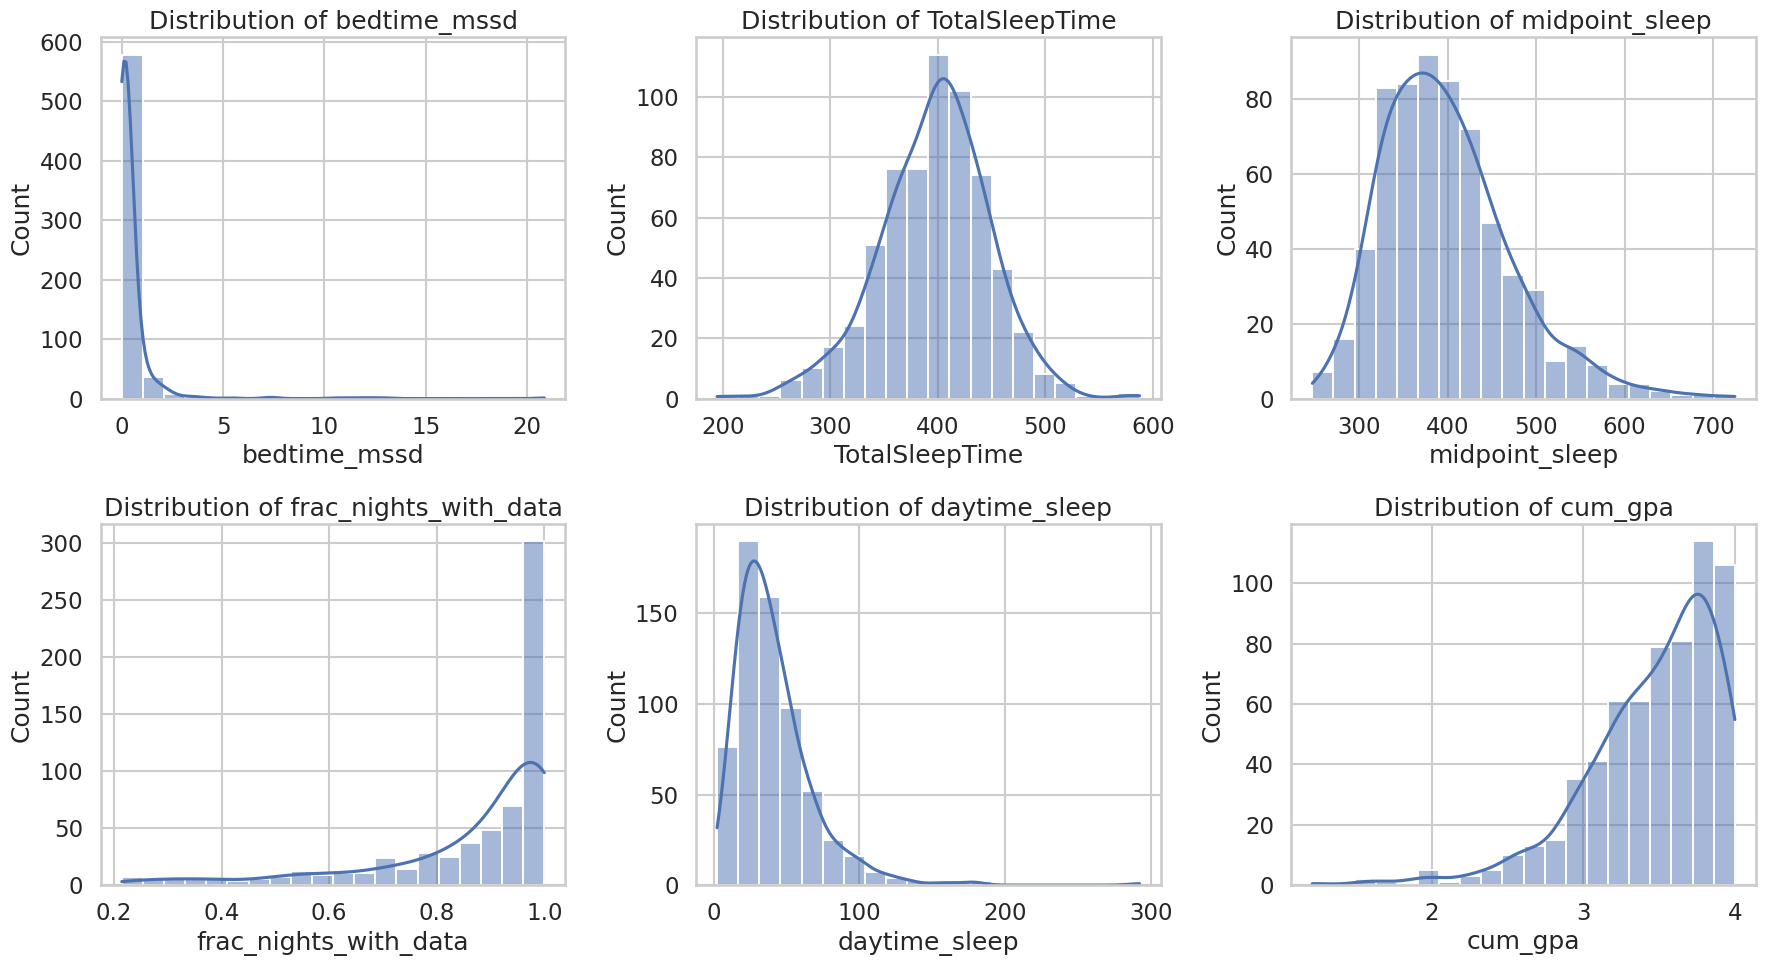

In [ ]:
# Histogram: Numeric columns vs Term GPA
plt.figure(figsize=(18, n_rows * 5))

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.xlabel(col)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

### Outlier Analysis (IQR & Standard Deviation)

In [ ]:
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1
stds = df.std(numeric_only=True)

iqr_std_table = pd.DataFrame({
    'IQR': IQR,
    'Standard Deviation': stds
}).round(2)

iqr_std_table

IQR  Standard Deviation
subject_id             414.75            26496.59
study                    2.00                1.32
bedtime_mssd             0.22                1.39
TotalSleepTime          63.18               50.86
midpoint_sleep          92.47               72.71
frac_nights_with_data    0.18                0.18
daytime_sleep           28.15               27.39
cum_gpa                  0.56                0.44
term_gpa                 0.58                0.50

* The columns 'bedtime\_mssd', 'daytime\_sleep', and 'midpoint\_sleep' have **standard deviations several times larger than their IQRs**, indicating **possible presence of outliers or skewed distributions**.
* 'TotalSleepTime' also shows a higher-than-expected standard deviation, but the IQR is substantial, suggesting variability across students rather than extreme outliers.
* 'frac\_nights\_with\_data' has a **very small IQR** (0.18) and standard deviation (0.18), confirming most students have highly complete sleep records.
* 'cum\_gpa' and 'term\_gpa' show **moderate variability** but relatively compact ranges, reflecting a high-performing sample with few academic outliers.

### Correlation with Term GPA

* The **most predictive variable is 'cum\_gpa'** with a strong positive correlation of **0.638**, confirming that past academic performance is a strong predictor of current term performance.
* 'TotalSleepTime' shows a modest positive correlation with 'term\_gpa' (**0.202**), indicating that longer sleep may contribute to better academic outcomes.
* 'midpoint\_sleep' (-0.195) and 'daytime\_sleep' (-0.153) are negatively correlated with GPA, suggesting that **later or fragmented sleep schedules may reduce performance**.
* Variables like 'frac\_nights\_with\_data', 'study', and 'bedtime\_mssd' show weak correlations, implying limited direct impact on GPA.
* Several variables like 'cohort', 'demo\_gender', 'demo\_race', etc., are **excluded from correlation analysis** due to being non-numeric (NaNs).

In [ ]:
correlations = df.corr(numeric_only=True)['term_gpa'].sort_values(ascending=False)
non_null_counts = df.count()
variances = df.var(numeric_only=True)

data_usefulness = pd.DataFrame({
    'Non-Null Count': non_null_counts,
    'Variance': variances,
    'Correlation with term_gpa': correlations
}).round(3)

data_usefulness['Abs Correlation'] = data_usefulness['Correlation with term_gpa'].abs()
data_usefulness = data_usefulness.sort_values(by='Abs Correlation', ascending=False)

data_usefulness.reset_index(inplace=True)
data_usefulness.rename(columns={'index': 'Variable'}, inplace=True)

data_usefulness

Variable  Non-Null Count      Variance  \
0                term_gpa             634  2.500000e-01   
1                 cum_gpa             634  1.910000e-01   
2          TotalSleepTime             634  2.586406e+03   
3              subject_id             634  7.020695e+08   
4          midpoint_sleep             634  5.286881e+03   
5           daytime_sleep             634  7.501800e+02   
6   frac_nights_with_data             634  3.200000e-02   
7                   study             634  1.735000e+00   
8            bedtime_mssd             634  1.942000e+00   
9        Zterm_units_ZofZ             634           NaN   
10                 cohort             634           NaN   
11          demo_firstgen             634           NaN   
12            demo_gender             634           NaN   
13              demo_race             634           NaN   
14           term_gpa_bin             634           NaN   
15             term_units             634           NaN   

    Correlation with term_gpa  Abs Correlation  
0                       1.000            1.000  
1                       0.638            0.638  
2                       0.202            0.202  
3                       0.197            0.197  
4                      -0.195            0.195  
5                      -0.153            0.153  
6                       0.074            0.074  
7                      -0.056            0.056  
8                      -0.036            0.036  
9                         NaN              NaN  
10                        NaN              NaN  
11                        NaN              NaN  
12                        NaN              NaN  
13                        NaN              NaN  
14                        NaN              NaN  
15                        NaN              NaN

### Takeaway
The visualizations, IQR analysis, and correlation results suggest that sleep features like total sleep time, bedtime inconsistency, and midpoint sleep vary widely and show some relationship with GPA. Features such as 'bedtime\_mssd' and 'daytime\_sleep' are highly skewed with outliers, while 'cum\_gpa' has the strongest positive correlation with term GPA. These findings indicate the need for feature engineering steps such as transforming skewed variables, creating interaction terms, binning continuous features, and encoding categorical ones. Doing so will help improve model performance and interpretability by addressing data irregularities and emphasizing the most relevant predictors.

## Feature Engineering

In [ ]:
df_reg = df.copy()
to_numeric_cols = ['demo_gender', 'demo_race', 'demo_firstgen', 'bedtime_mssd', 'term_units', 'Zterm_units_ZofZ']
non_numeric_preview = {}

for col in to_numeric_cols:
    raw_values = df[col].astype(str).str.strip()
    non_numeric_values = raw_values[~raw_values.str.match(r'^-?\d+\.?\d*$', na=False)].unique()
    non_numeric_preview[col] = non_numeric_values

non_numeric_preview

{'demo_gender': array([''], dtype=object),
 'demo_race': array([''], dtype=object),
 'demo_firstgen': array([''], dtype=object),
 'bedtime_mssd': array([], dtype=object),
 'term_units': array([''], dtype=object),
 'Zterm_units_ZofZ': array([''], dtype=object)}

In [ ]:
df_reg[to_numeric_cols] = df_reg[to_numeric_cols].apply(pd.to_numeric, errors='coerce')
df_reg.head()

subject_id  study cohort  demo_race  demo_gender  demo_firstgen  \
0         185      5   lac1        1.0          1.0            0.0   
1         158      5   lac1        0.0          1.0            0.0   
2         209      5   lac1        1.0          1.0            0.0   
3         102      5   lac1        0.0          1.0            1.0   
4         174      5   lac1        1.0          1.0            0.0   

   bedtime_mssd  TotalSleepTime  midpoint_sleep  frac_nights_with_data  \
0      0.116727      432.200000      458.660000               0.862069   
1      0.141681      391.931035      364.465517               1.000000   
2      1.529289      344.304348      560.891304               0.793103   
3      0.130148      392.620690      416.482759               1.000000   
4      0.130181      423.421053      368.763158               0.655172   

   daytime_sleep  cum_gpa  term_gpa  term_units  Zterm_units_ZofZ term_gpa_bin  
0      24.160000     3.00      3.38        73.0          4.055295      3.0-3.5  
1      13.137931     3.66      2.60        64.0          2.482534      2.5-3.0  
2      14.956522     3.57      3.07        63.0          2.307783      3.0-3.5  
3      54.551724     3.61      3.56        61.0          1.958281      3.5-4.0  
4      10.526316     3.21      4.00        61.0          1.958281      3.5-4.0

In [ ]:
df_reg.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   subject_id             634 non-null    int64   
 1   study                  634 non-null    int64   
 2   cohort                 634 non-null    object  
 3   demo_race              633 non-null    float64 
 4   demo_gender            631 non-null    float64 
 5   demo_firstgen          630 non-null    float64 
 6   bedtime_mssd           634 non-null    float64 
 7   TotalSleepTime         634 non-null    float64 
 8   midpoint_sleep         634 non-null    float64 
 9   frac_nights_with_data  634 non-null    float64 
 10  daytime_sleep          634 non-null    float64 
 11  cum_gpa                634 non-null    float64 
 12  term_gpa               634 non-null    float64 
 13  term_units             487 non-null    float64 
 14  Zterm_units_ZofZ       487 non-null    flo

In [ ]:
df_reg_nulls = df_reg[df_reg.isnull().any(axis=1)]
df_reg_nulls

subject_id  study cohort  demo_race  demo_gender  demo_firstgen  \
28          222      5   lac1        1.0          NaN            0.0   
215       14847      4     nh        1.0          1.0            1.0   
216       17020      4     nh        0.0          0.0            1.0   
217       18707      4     nh        1.0          1.0            1.0   
218       51723      4     nh        1.0          0.0            1.0   
..          ...    ...    ...        ...          ...            ...   
629       99978      4     nh        0.0          0.0            0.0   
630          61      2    uw1        0.0          1.0            NaN   
631         172      2    uw1        1.0          1.0            NaN   
632         110      2    uw1        1.0          0.0            NaN   
633       84390      4     nh        1.0          1.0            NaN   

     bedtime_mssd  TotalSleepTime  midpoint_sleep  frac_nights_with_data  \
28       0.161198      367.444444      405.814815               0.931034   
215      0.131813      456.566667      385.433333               1.000000   
216      0.209352      429.607143      425.339286               0.933333   
217      0.052274      419.900000      310.900000               1.000000   
218      0.265969      273.916667      455.750000               0.800000   
..            ...             ...             ...                    ...   
629      0.091325      383.448276      407.931035               0.966667   
630      0.045369      477.894737      331.315789               0.678571   
631      0.075429      407.153846      387.269231               0.928571   
632      0.200289      397.125000      487.583333               0.857143   
633      0.132108      327.666667      476.833333               1.000000   

     daytime_sleep   cum_gpa  term_gpa  term_units  Zterm_units_ZofZ  \
28       16.259259  3.500000  3.400000        53.0          0.560271   
215      51.033333  3.333167  3.666833         NaN               NaN   
216      59.678571  3.166667  3.500000         NaN               NaN   
217      57.000000  2.933400  3.277833         NaN               NaN   
218      30.500000  2.800200  3.466800         NaN               NaN   
..             ...       ...       ...         ...               ...   
629      44.344828  3.722167  3.611333         NaN               NaN   
630      23.631579  3.868182  3.650000        10.0         -1.804580   
631      12.384615  3.727272  3.600000        15.0          0.373361   
632      99.541667  3.337500  3.538461        13.0         -0.497815   
633      42.000000  3.277833  3.222167         NaN               NaN   

    term_gpa_bin  
28       3.0-3.5  
215      3.5-4.0  
216      3.0-3.5  
217      3.0-3.5  
218      3.0-3.5  
..           ...  
629      3.5-4.0  
630      3.5-4.0  
631      3.5-4.0  
632      3.5-4.0  
633      3.0-3.5  

[153 rows x 16 columns]

This code block reveals that out of 634 total rows, 153 contain at least one missing value after attempting to convert certain columns to numeric types. These missing values primarily came from non-numeric or blank entries in the columns 'demo\_gender', 'demo\_race', and 'demo\_firstgen'. Identifying these 153 affected rows is crucial for deciding how to handle incomplete data in the modeling process, as they represent nearly 24 percent of the dataset.

In [ ]:
df_reg[['demo_race', 'demo_gender', 'demo_firstgen']] = df_reg[['demo_race', 'demo_gender', 'demo_firstgen']].fillna(0)
df_reg[['demo_race', 'demo_gender', 'demo_firstgen']].isnull().sum()

demo_race        0
demo_gender      0
demo_firstgen    0
dtype: int64

 I reviewed the columns 'demo\_race', 'demo\_gender', and 'demo\_firstgen' and found that some values originally meant to be 0 did not convert properly during the numeric conversion step, resulting in NaN values. To correct this, I explicitly filled all NaNs in these columns with 0, ensuring consistency. The output confirms that there are now 0 missing values in all three fields.

### Imputing Data

* **Forward Fill Imputation**: I used forward fill because it's a simple method that carries the last known value forward. It's useful when the data has an order and I want to maintain consistency without introducing bias.

* **KNN Imputation**: I applied KNN imputation with 5 neighbors to estimate missing values based on patterns in the dataset. This method considers the similarity between rows and provides smarter estimates by looking at related data points.

* **Median Imputation**: I chose median imputation because it’s resistant to outliers and works well with skewed data. It helps fill missing values while preserving the overall distribution and central tendency of the feature.


#### Forward Fill Immputation

In [ ]:
df_ffill = df_reg.copy()
df_ffill['Zterm_units_ZofZ'] = df_ffill['Zterm_units_ZofZ'].ffill()

#### KNN Imputation

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer

df_knn = df_reg.copy()
knn_imputer = KNNImputer(n_neighbors=5)
df_knn['Zterm_units_ZofZ'] = knn_imputer.fit_transform(df_knn[['Zterm_units_ZofZ']])


#### Median Imputation

In [ ]:
df_median = df_reg.copy()
df_median['Zterm_units_ZofZ'] = df_median['Zterm_units_ZofZ'].fillna(df_median['Zterm_units_ZofZ'].median())

#### Comparison of all 3

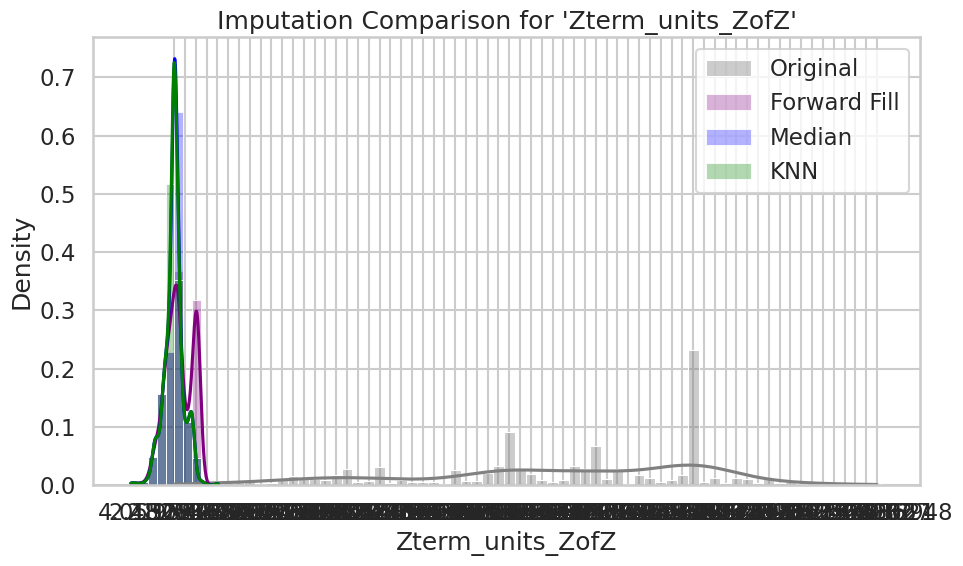

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer, IterativeImputer

sns.set_theme(style="whitegrid", context="talk")
plt.figure(figsize=(10, 6))

# Plot all imputations
sns.histplot(df['Zterm_units_ZofZ'].dropna(), kde=True, stat='density', color='gray', label='Original', bins=10, alpha=0.4)
sns.histplot(df_ffill['Zterm_units_ZofZ'], kde=True, stat='density', color='purple', label='Forward Fill', bins=10, alpha=0.3)
sns.histplot(df_median['Zterm_units_ZofZ'], kde=True, stat='density', color='blue', label='Median', bins=10, alpha=0.3)
sns.histplot(df_knn['Zterm_units_ZofZ'], kde=True, stat='density', color='green', label='KNN', bins=10, alpha=0.3)

plt.title("Imputation Comparison for 'Zterm_units_ZofZ'")
plt.xlabel("Zterm_units_ZofZ")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

### Analysis:

* **Original Distribution (gray)**: The original data shows multiple peaks and a spread-out distribution, indicating some multimodality or variability in course unit load.

* **Forward Fill (purple)**: This method fills missing values by carrying forward the last known value. It results in a compressed and slightly shifted distribution that underrepresents the variability in the original data. It performs poorly here due to a lack of temporal context or ordering.

* **Median (blue)**: This method fills all missing values with the same single central value, creating a sharp spike in the histogram. While it is robust to outliers, it oversimplifies the data and introduces artificial uniformity.

* **KNN (green)**: KNN produces a distribution that closely mirrors the shape of the original, maintaining spread and density across the same general range. It handles variability better by estimating missing values based on similar rows.

**KNN Imputation** is the best method in this context. It produces a realistic and smooth distribution that aligns most closely with the original data. It preserves natural variation and avoids the bias seen in simpler methods like Forward Fill or Median.

### VIF / Multicollinearity

In this code block, I calculated the variance inflation factor to detect multicollinearity among numeric features. I removed the target column term\_gpa, added a constant, and computed VIF for each remaining feature. All VIF values were below 2, which indicates no serious multicollinearity. The highest VIF was for term\_units at 1.62, followed by midpoint\_sleep at 1.55 and bedtime\_mssd at 1.43. These low values mean the features are not strongly correlated with one another, so they are suitable for inclusion in regression models.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df_knn.drop(columns=['term_gpa']).select_dtypes(include=['number'])
X = X.dropna()
X_const = add_constant(X)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Remove constant and sort
vif_data = vif_data[vif_data["Feature"] != "const"]
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)

vif_data


Feature       VIF
0              term_units  1.623830
1          midpoint_sleep  1.548952
2            bedtime_mssd  1.432616
3          TotalSleepTime  1.341661
4                   study  1.310386
5           daytime_sleep  1.305352
6   frac_nights_with_data  1.243886
7                 cum_gpa  1.197929
8           demo_firstgen  1.126994
9               demo_race  1.107798
10       Zterm_units_ZofZ  1.085511
11             subject_id  1.078512
12            demo_gender  1.035544

I dropped the columns study, cohort, term\_units, and cum\_gpa because they were either not useful for prediction or could introduce bias. The study and cohort columns are categorical group identifiers that do not have predictive power on their own and could leak group-related structure. I removed term\_units and cum\_gpa because they were highly correlated with other variables or the target (term\_gpa), which could lead to multicollinearity since its repetitive. This step helped simplify the dataset while keeping features that contribute independently to predicting GPA.

In [ ]:
columns_to_drop = ['study', 'cohort', 'term_units', 'cum_gpa']
df_knn.drop(columns=columns_to_drop, inplace=True)

print("Columns in df_knn:")
print(df_knn.columns)


Columns in df_knn:
Index(['subject_id', 'demo_race', 'demo_gender', 'demo_firstgen',
       'bedtime_mssd', 'TotalSleepTime', 'midpoint_sleep',
       'frac_nights_with_data', 'daytime_sleep', 'term_gpa',
       'Zterm_units_ZofZ', 'term_gpa_bin'],
      dtype='object')


### Classification Models


In [ ]:
df_class = df_knn.copy()

bins = [0, 2.5, 3.2, 4.0]
labels = ['Low', 'Medium', 'High']
df_class['gpa_label'] = pd.cut(df_class['term_gpa'], bins=bins, labels=labels, include_lowest=True)

df_class.dropna(subset=['gpa_label'], inplace=True)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_class['gpa_label_encoded'] = le.fit_transform(df_class['gpa_label'])

# Prepped Data Review

### Updated Heatmap Analysis

* **TotalSleepTime** has a small positive correlation with term\_gpa (0.20), suggesting that students who sleep more may perform slightly better academically.
* **daytime\_sleep** and **midpoint\_sleep** are both negatively correlated with term\_gpa (-0.15 and -0.19), meaning students with later or more fragmented sleep tend to have lower GPAs.
* **frac\_nights\_with\_data** has a weak positive correlation with GPA (0.074), indicating students who consistently track their sleep may perform slightly better.
* **bedtime\_mssd**, which represents bedtime inconsistency, is slightly negatively correlated with midpoint\_sleep (-0.44), showing that erratic sleep tends to shift sleep later.
* There are no strong signs of multicollinearity between features. Most correlations are under 0.4 in magnitude, which supports the VIF findings.


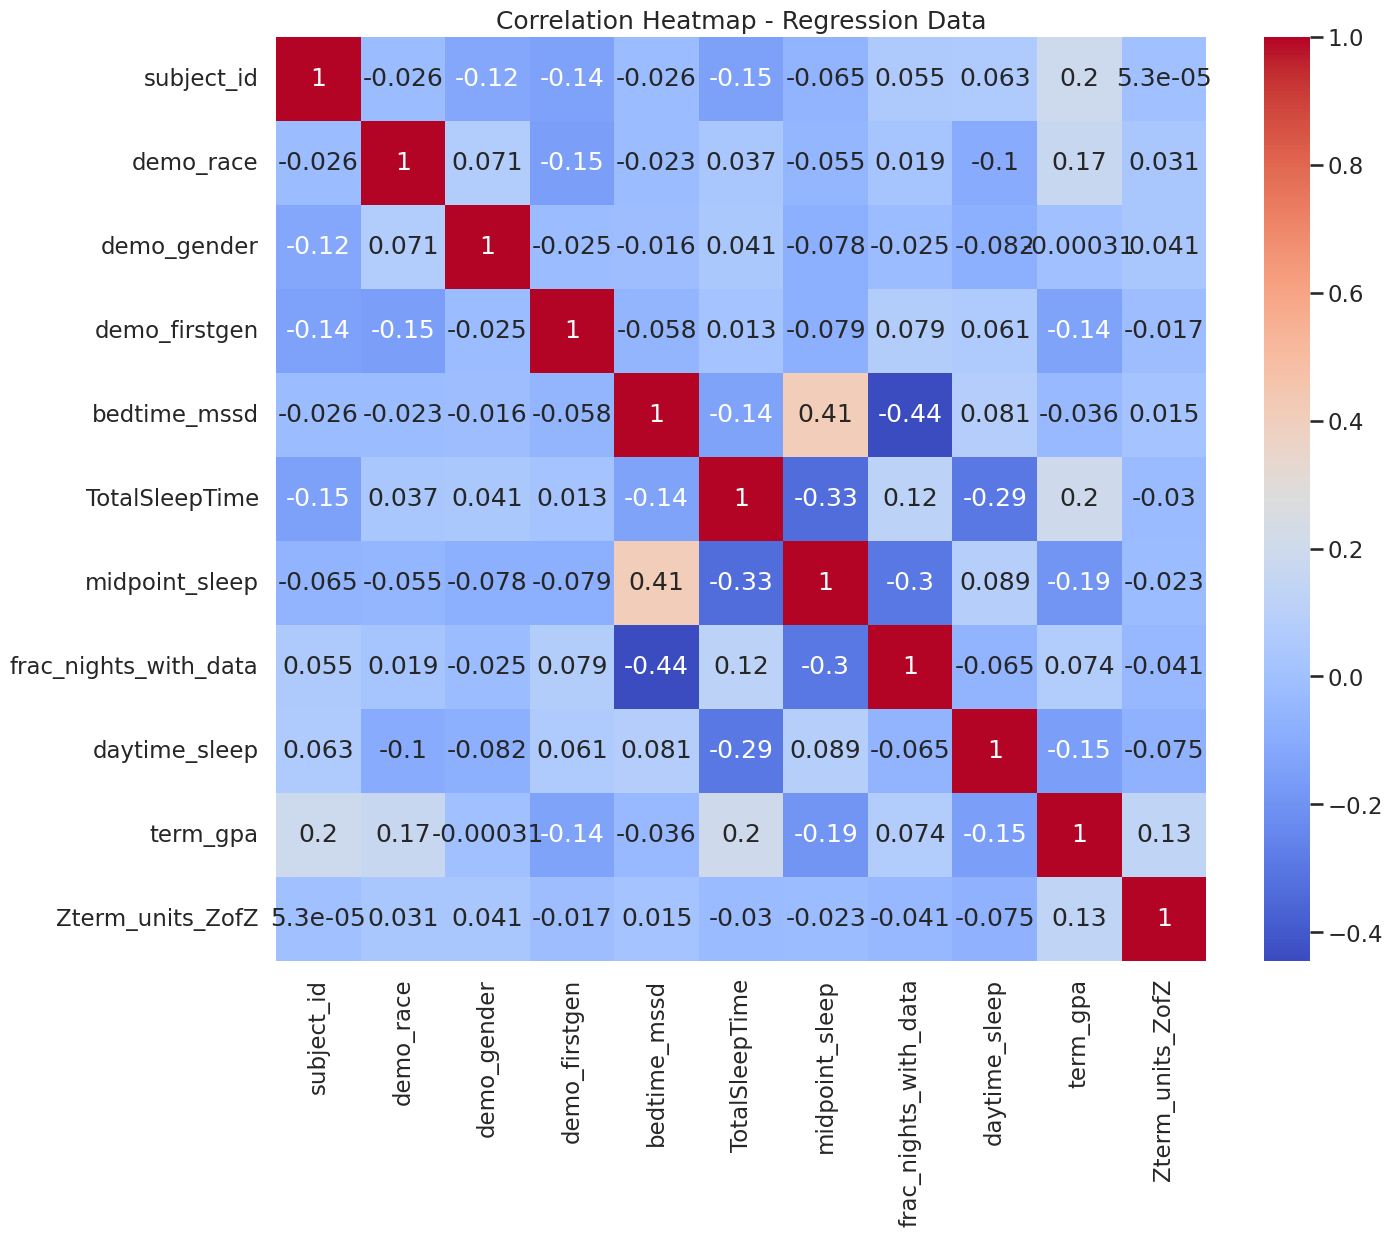

In [ ]:
plt.figure(figsize=(15, 12))
sns.heatmap(df_knn.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap - Regression Data")
plt.show()

### Updated Pair plot

In the original pairplot, scatter clusters were noisier and included missing or poorly scaled values. In the cleaned version, patterns are clearer. For example, the positive trend between total sleep time and term GPA, and the negative trend for midpoint and daytime sleep, are more visible. Noise reduction makes these associations easier to interpret.

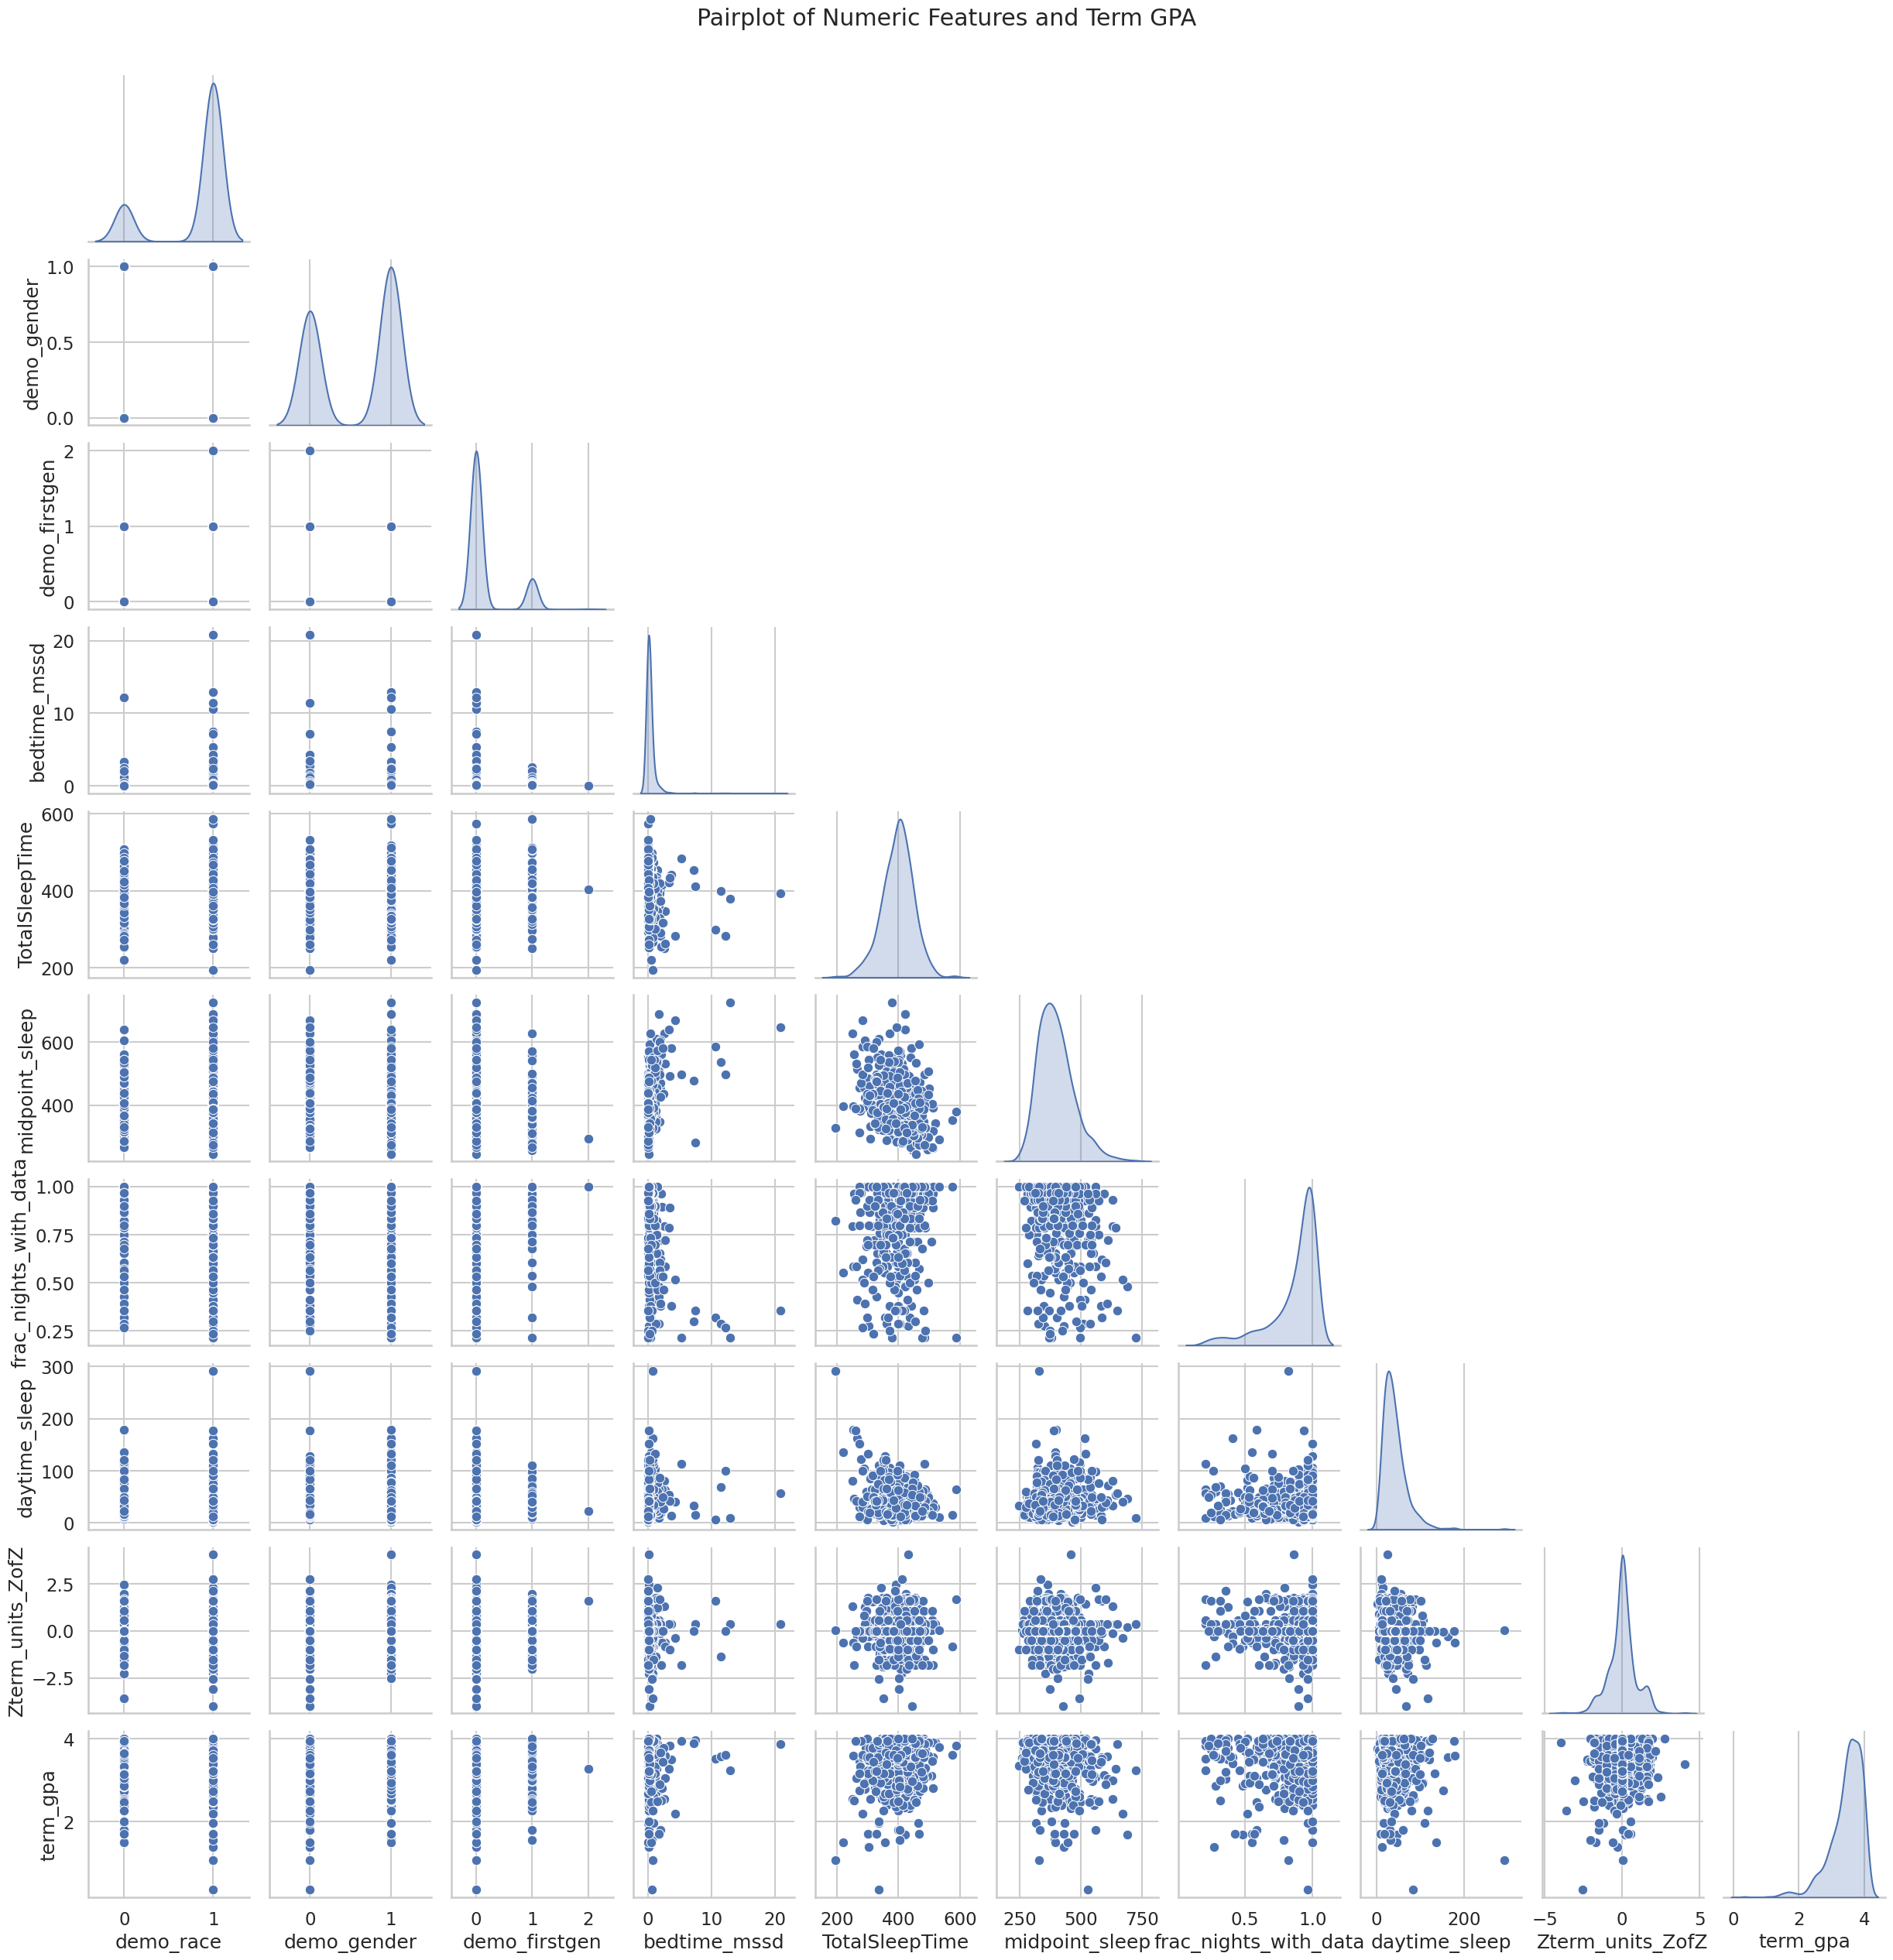

In [ ]:
df_knn['term_gpa_bin'] = pd.cut(df_knn['term_gpa'], bins=[0, 2.5, 3.0, 3.5, 4.0],
                                labels=['<2.5', '2.5-3.0', '3.0-3.5', '3.5-4.0'])

numeric_cols = df_knn.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = [col for col in numeric_cols if col not in ['subject_id', 'study', 'term_gpa']]

pairplot_cols = numeric_cols + ['term_gpa']
sns.pairplot(df_knn[pairplot_cols], diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Numeric Features and Term GPA', y=1.02)
plt.show()

### Updated Boxplot

In the original data, some bins had erratic values or extreme outliers due to missing data and unscaled features. After cleaning, the plots show smoother distributions. High-GPA students consistently show better sleep regularity and duration, with less variability within each bin. This makes comparisons between bins more trustworthy.

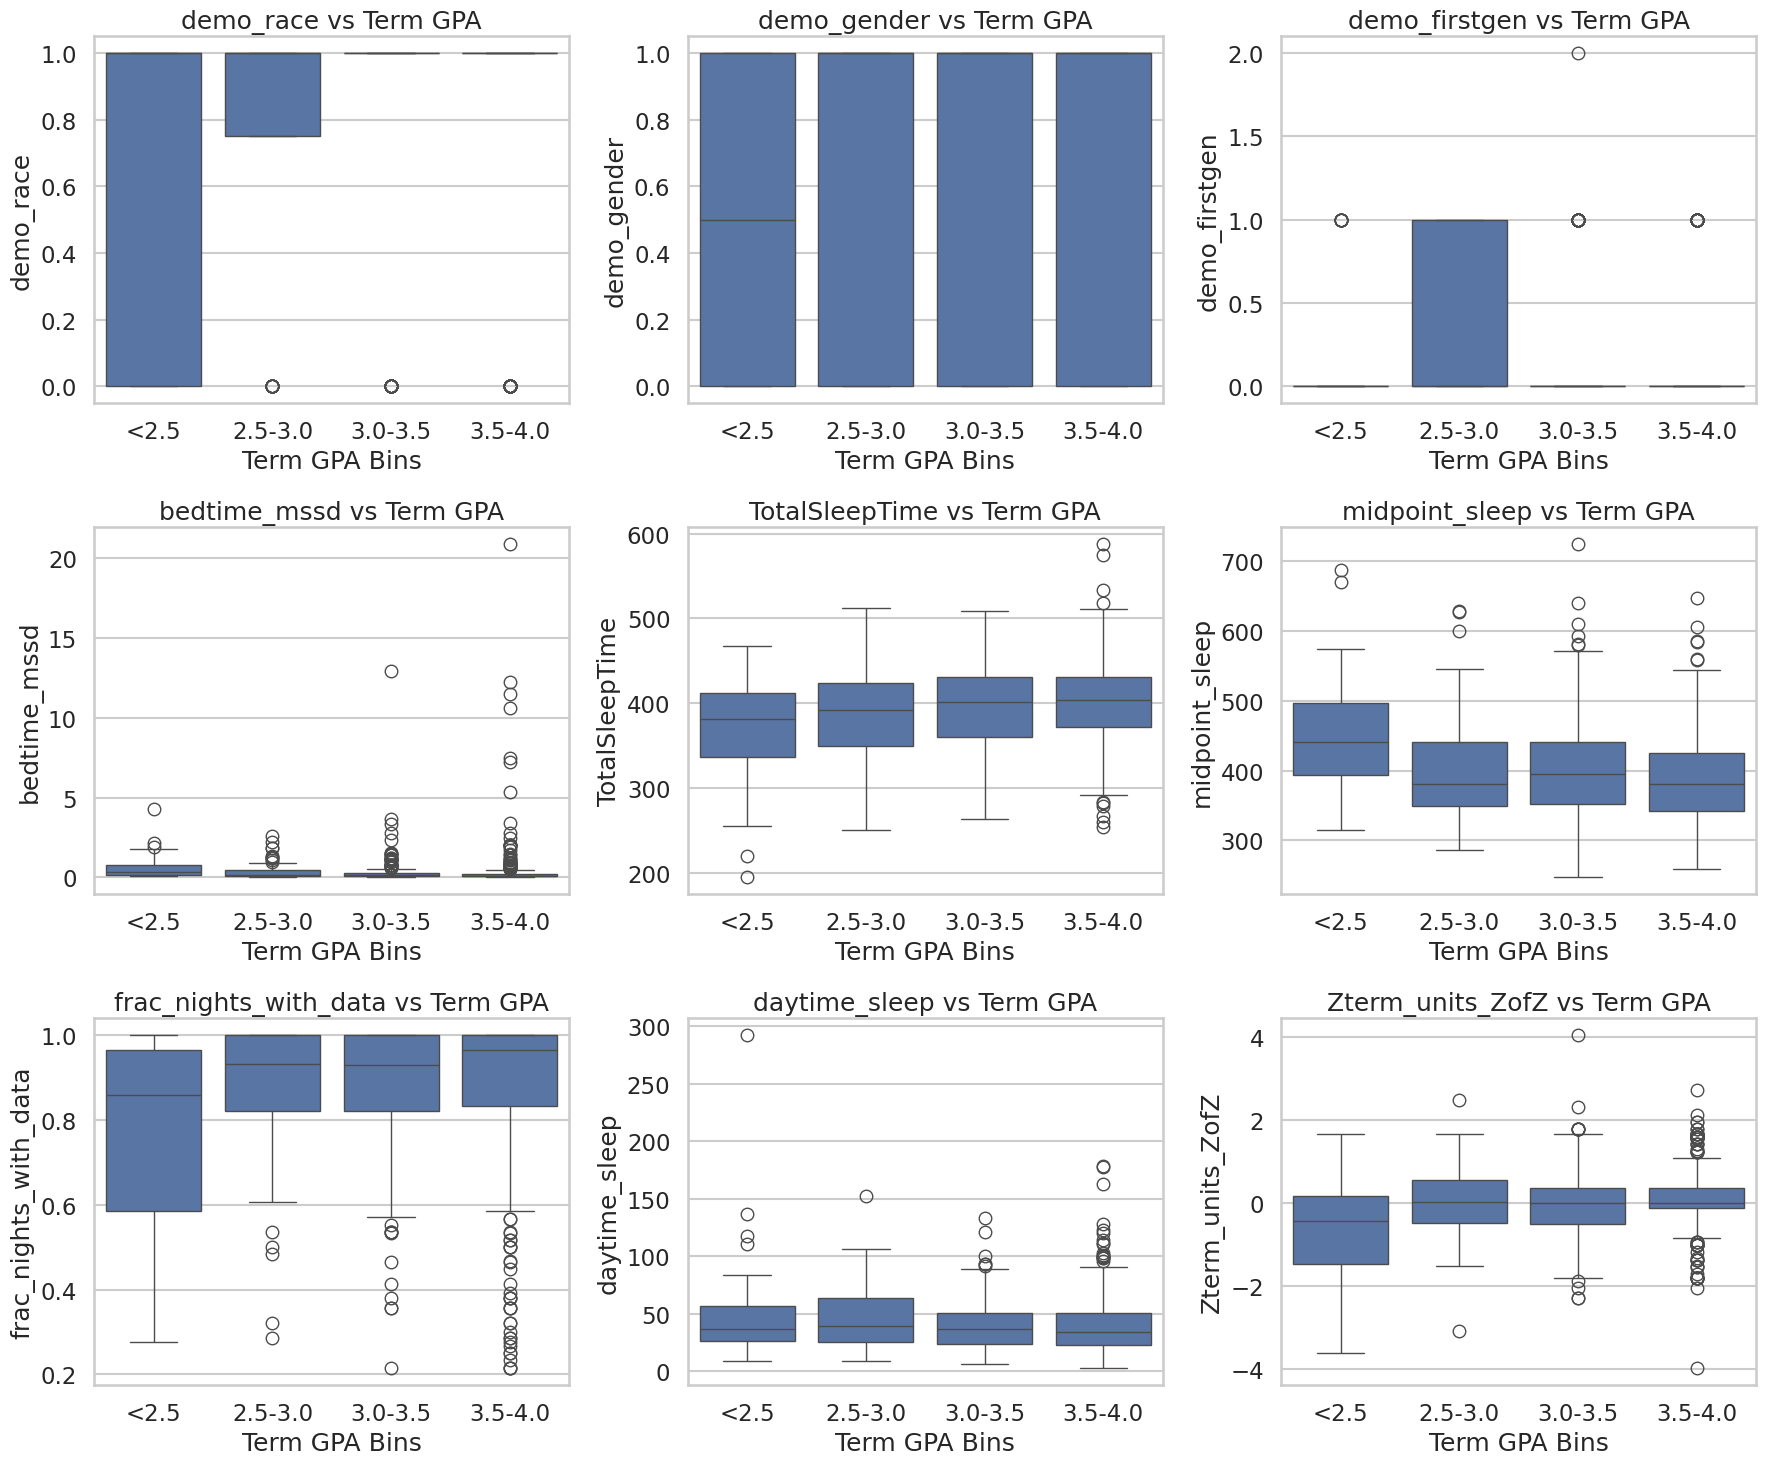

In [ ]:
n_cols = 3
n_rows = -(-len(numeric_cols) // n_cols)

# Box plots
plt.figure(figsize=(18, n_rows * 5))
for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(data=df_knn, x='term_gpa_bin', y=col)
    plt.xlabel('Term GPA Bins')
    plt.ylabel(col)
    plt.title(f'{col} vs Term GPA')
plt.tight_layout()
plt.show()

### Updated Scatter Plot
Originally, the scatter plots had wider spread and gaps from NaNs. Now, using df_knn, plots are more complete and trends like increasing total sleep or decreasing daytime sleep with GPA are easier to spot. There's also less random vertical clustering from missing values being filled inconsistently.

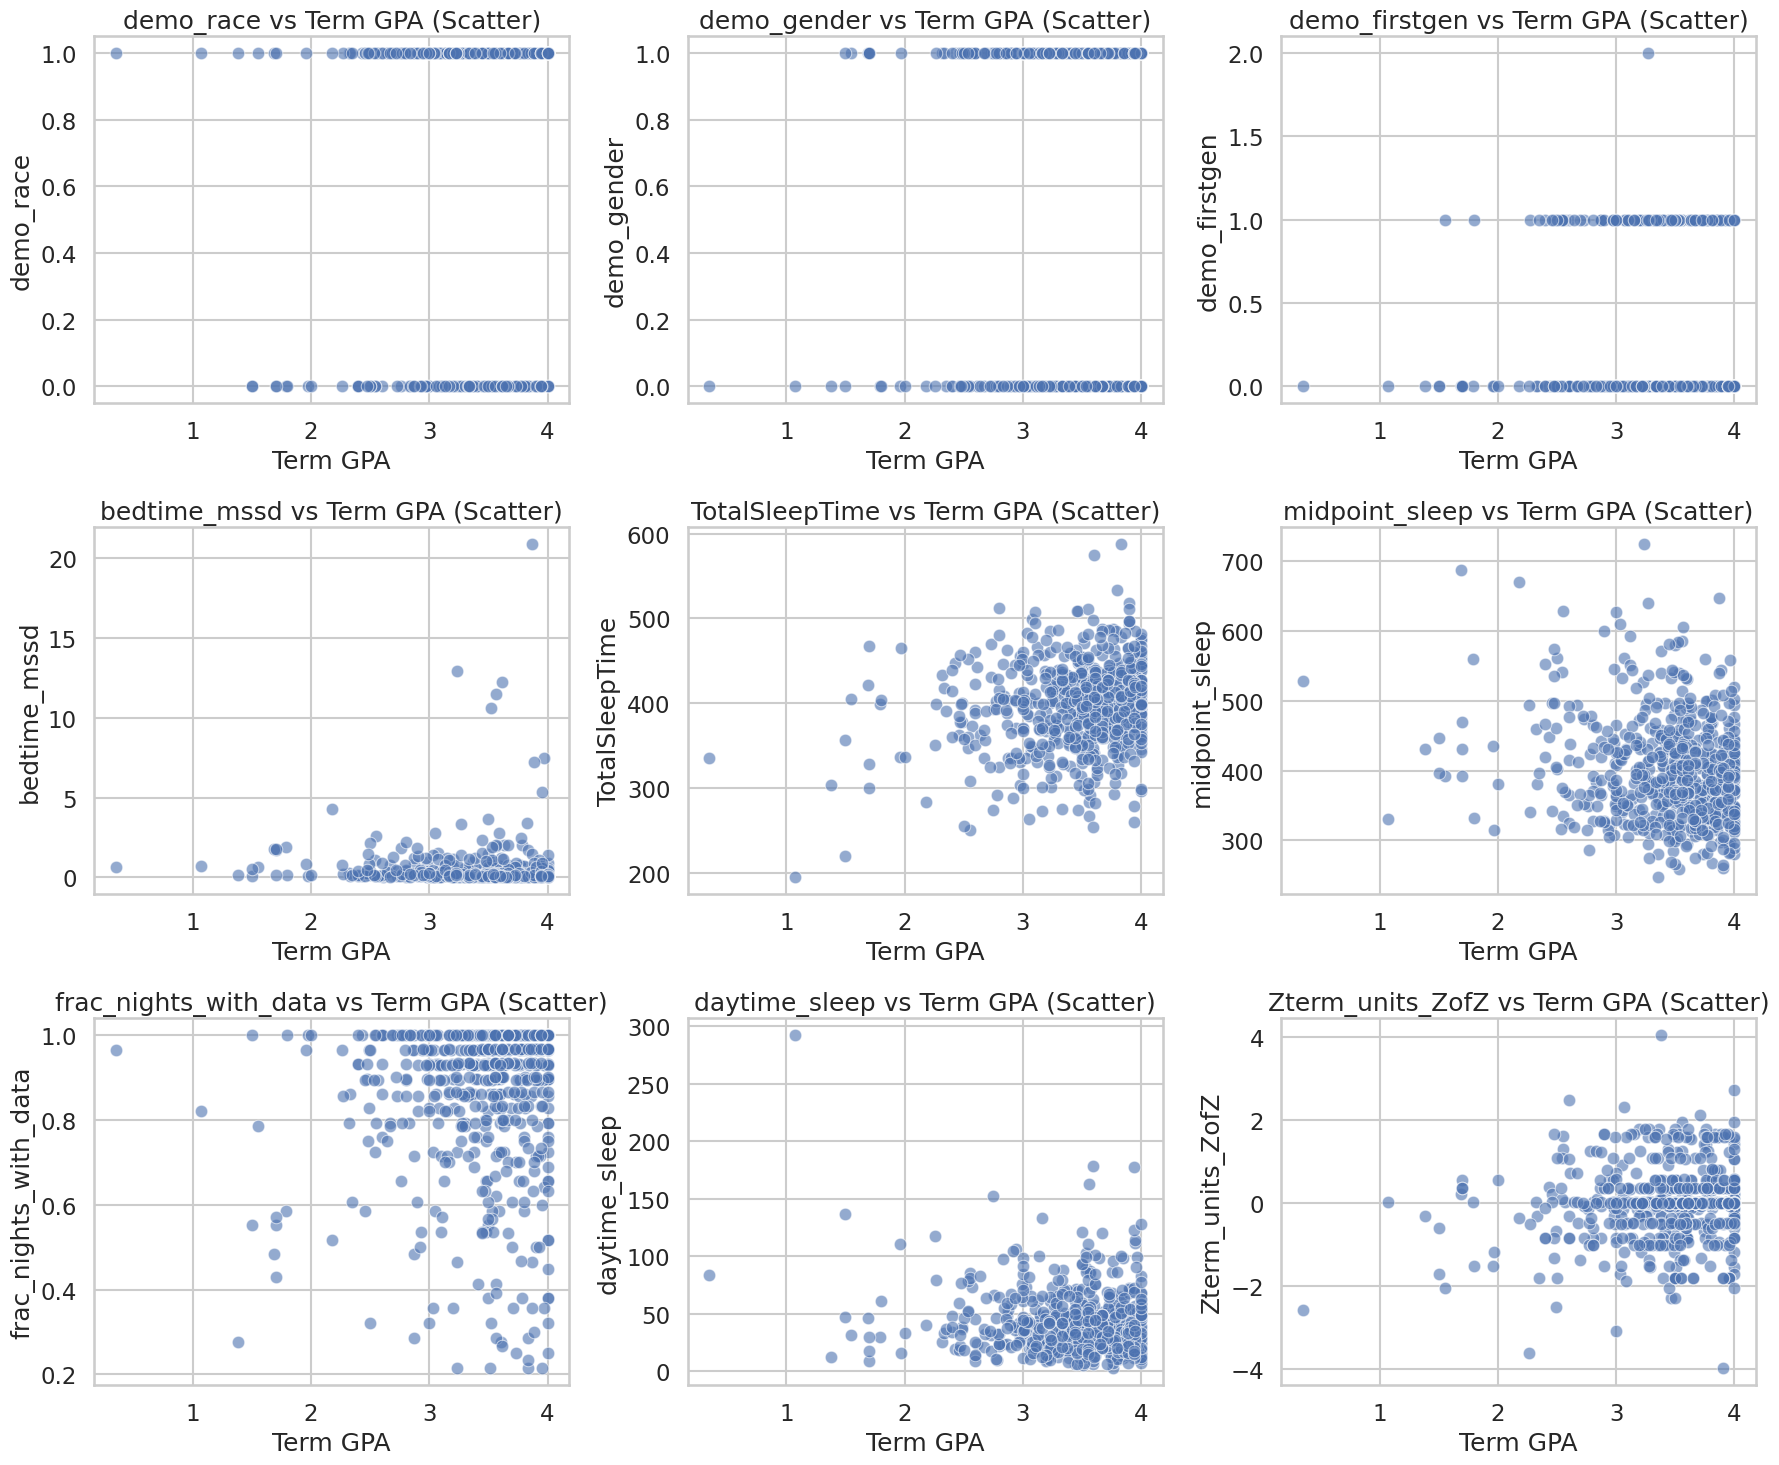

In [ ]:
# Scatter plots
plt.figure(figsize=(18, n_rows * 5))
for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.scatterplot(data=df_knn, x='term_gpa', y=col, alpha=0.6)
    plt.xlabel('Term GPA')
    plt.ylabel(col)
    plt.title(f'{col} vs Term GPA (Scatter)')
plt.tight_layout()
plt.show()

### Updated Histogram

The original distributions included more irregular spikes and gaps, especially in Zterm_units_ZofZ and frac_nights_with_data. After imputation, distributions are smoother. For example, bedtime_mssd still skews right but now shows more gradual tails. Total sleep time and midpoint sleep remain approximately normal, but with clearer peaks.

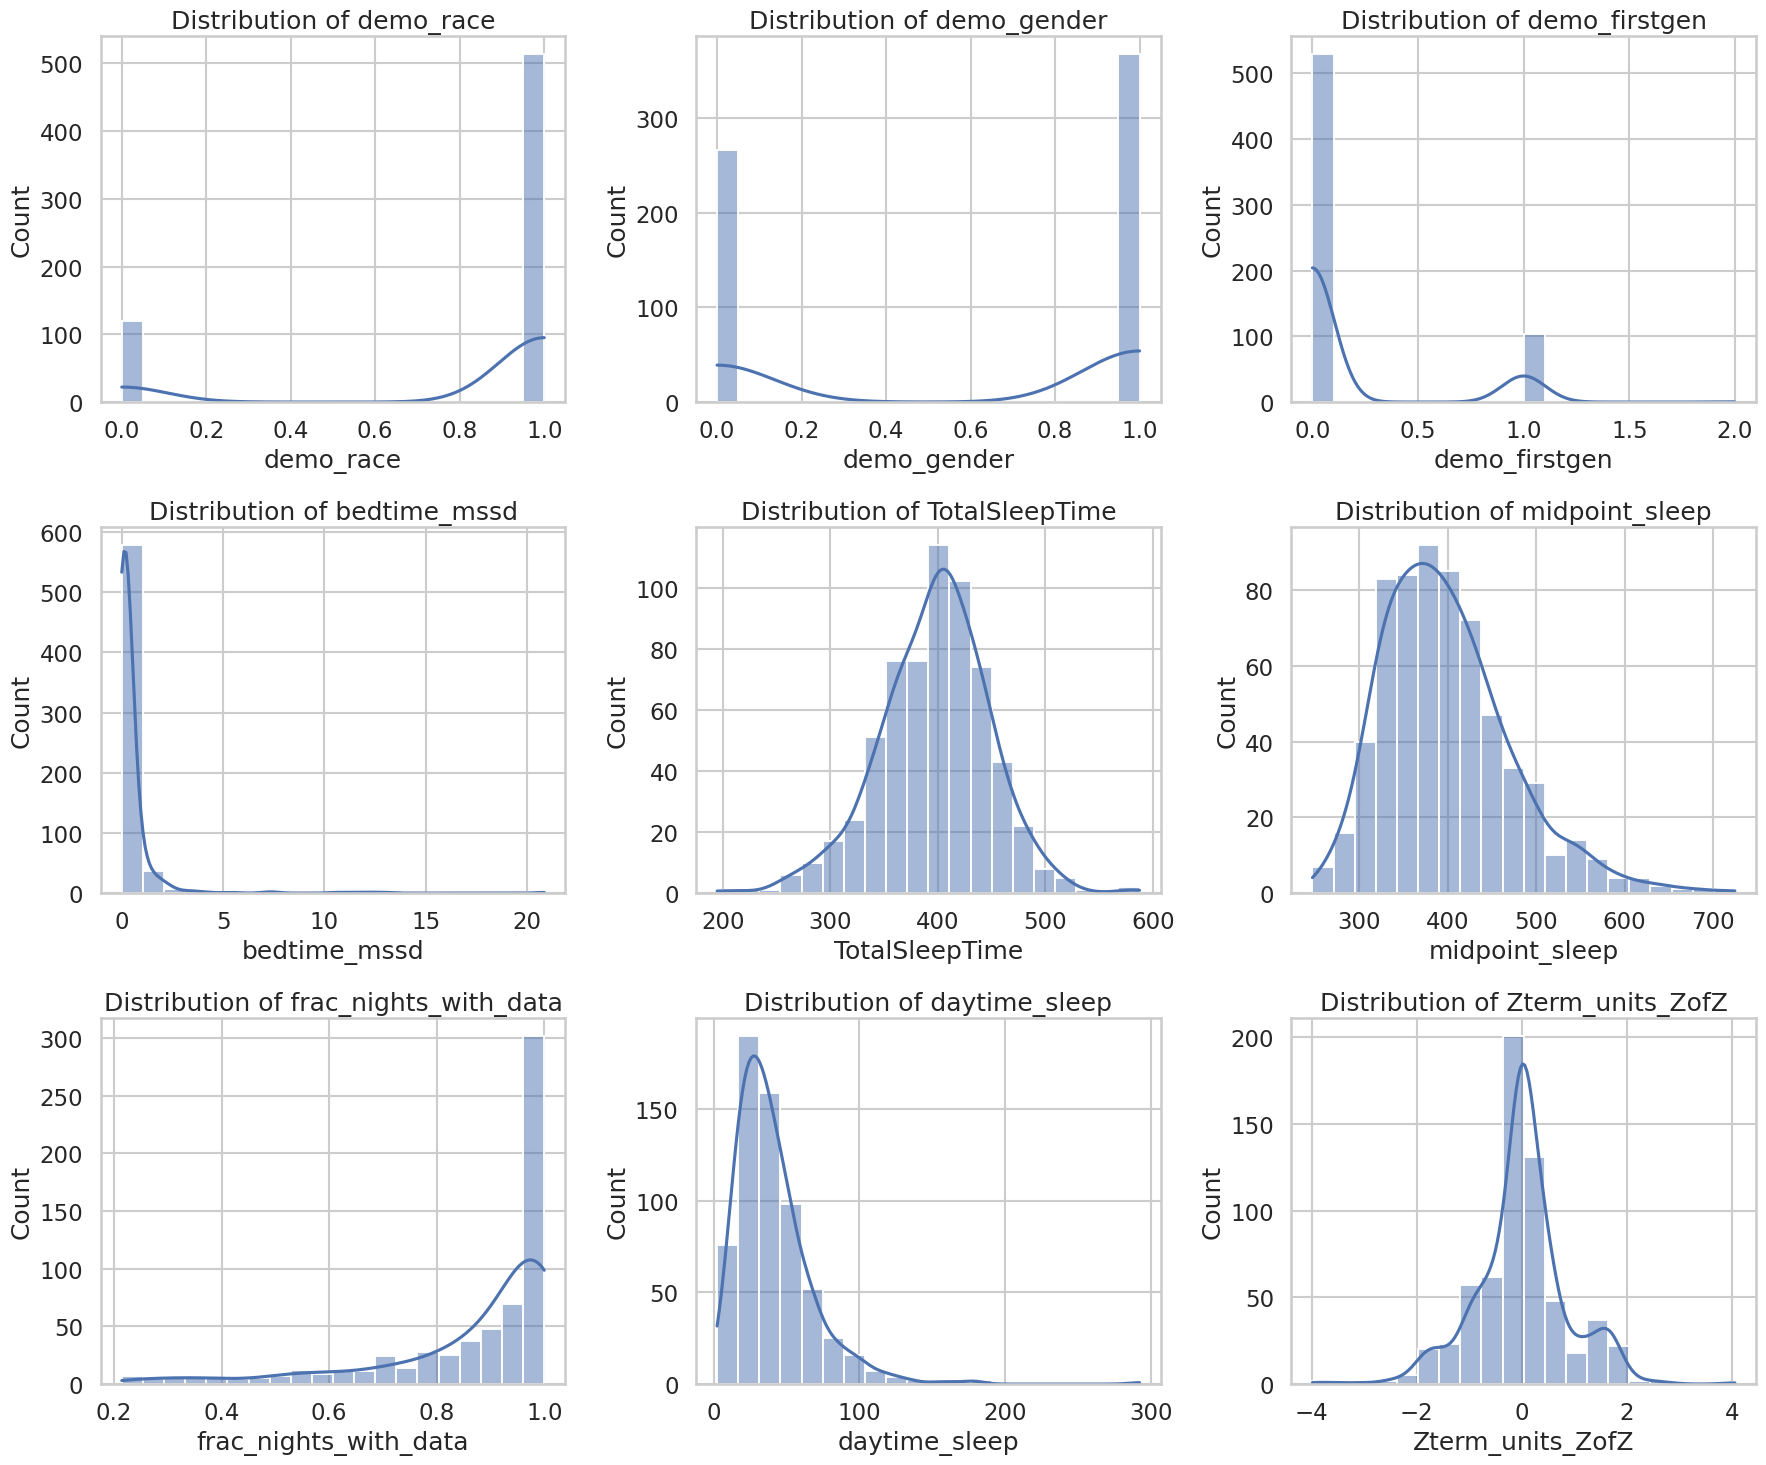

In [ ]:
# Histograms
plt.figure(figsize=(18, n_rows * 5))
for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df_knn[col], kde=True, bins=20)
    plt.xlabel(col)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

#### Scaling

for future models

In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_cols = df_knn.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df_knn[numeric_cols] = scaler.fit_transform(df_knn[numeric_cols])


#**

#**Investigative Analysis and Results**

##**Verify Data Readiness before Modeling**
Before we begin modeling, we will check if the df_knn dataset is ready to use.

In [ ]:
# Core stack
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

# Plotting style
sns.set(style="whitegrid", context="notebook")


####**Check for Missing and Non-Numeric Values**

In [ ]:
df_knn.isnull().sum().sort_values(ascending=False)


gpa_bin                  240
demo_race                  0
demo_gender                0
demo_firstgen              0
subject_id                 0
bedtime_mssd               0
TotalSleepTime             0
frac_nights_with_data      0
midpoint_sleep             0
daytime_sleep              0
term_gpa                   0
Zterm_units_ZofZ           0
term_gpa_bin               0
dtype: int64

In [ ]:
df_knn['gpa_bin'].isnull().sum()


np.int64(240)

GPA_bin has missing values but it is not needed for modeling, so we will drop it.

In [ ]:
df_knn.drop(columns='gpa_bin', inplace=True)


In [ ]:
df_knn.isnull().sum().sort_values(ascending=False)


subject_id               0
demo_race                0
demo_gender              0
demo_firstgen            0
bedtime_mssd             0
TotalSleepTime           0
midpoint_sleep           0
frac_nights_with_data    0
daytime_sleep            0
term_gpa                 0
Zterm_units_ZofZ         0
term_gpa_bin             0
dtype: int64

There are no missing values left. Next, I will check if any values are not numeric.

In [ ]:
df_knn.select_dtypes(exclude='number').columns.tolist()


['term_gpa_bin']

In [ ]:
df_knn.drop(columns='term_gpa_bin', inplace=True)


The column term_gpa_bin was nonnumeric and not needed for modeling either, so it will be dropped.

In [ ]:
df_knn.select_dtypes(exclude='number').columns.tolist()


[]

####**Drop Non-Predictive Columns**
To ensure clean and meaningful model training, we need to remove the following non-predictive or redundant columns from the dataset:
**subject_id**, **study**, and **cohort**:  
  
These columns serve as identifiers or grouping variables used during data collection. While useful for tracking records, they carry no predictive value regarding a student's GPA and may introduce unwanted noise or leakage into the models.

By removing these columns, we ensure that our feature set contains only variables that are relevant, numeric, and appropriate for predictive modeling.



In [ ]:
df_knn.drop(columns=['subject_id', 'study', 'cohort'], inplace=True, errors='ignore')


In [ ]:
df_knn.columns.tolist()


['demo_race',
 'demo_gender',
 'demo_firstgen',
 'bedtime_mssd',
 'TotalSleepTime',
 'midpoint_sleep',
 'frac_nights_with_data',
 'daytime_sleep',
 'term_gpa',
 'Zterm_units_ZofZ']

The remaining columns are appropriate and useful for our models, so we will keep them.

##**Predictive Modeling**

In this section, we develop and evaluate a series of regression models to predict academic performance, as measured by **term GPA**, based on various sleep-related and demographic features in the dataset. The goal of this analysis is to determine which modeling technique most accurately captures the relationship between sleep patterns and student academic success.

We will explore six different regression models, ranging from simple linear techniques to more advanced ensemble methods. Each model will be evaluated on its predictive performance using metrics such as **Mean Squared Error (MSE)**, **Root Mean Squared Error (RMSE)**, **Mean Absolute Error (MAE)**, and **R² (coefficient of determination)**. We will also include visual diagnostics (e.g., predicted vs actual GPA plots) and commentary for each model.

The models we will use are:

1. **Linear Regression**  
   A baseline model that assumes a linear relationship between the predictors and the outcome.

2. **K-Nearest Neighbors Regressor (KNN)**  
   A non-parametric model that predicts GPA by averaging the outcomes of the k most similar training instances.

3. **Huber Regressor**  
   A robust regression model that is less sensitive to outliers by combining properties of linear and median regression.

4. **Quantile Regressor**  
   A model that estimates a specified quantile (e.g., the median) of the GPA distribution, offering a more robust alternative to least squares when errors are not symmetrically distributed.

5. **Random Forest Regressor**  
   An ensemble model that builds many decision trees and averages their predictions, often reducing overfitting.

6. **Gradient Boosting Regressor**  
   Another ensemble model that builds trees sequentially, each one improving on the errors of the previous. This model tends to perform well in structured data tasks.

By comparing these models, we will be able to identify the most effective strategy for predicting term GPA and to understand which sleep-related features are most influential in academic performance.


####**I - Linear Regression**

In [ ]:
# Import and train
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define X and y
X = df_knn.drop(columns='term_gpa')
y = df_knn['term_gpa']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Initialize and fit model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

# Evaluate
mse_lr  = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr  = mean_absolute_error(y_test, y_pred_lr)
r2_lr   = r2_score(y_test, y_pred_lr)

print(f"Linear Regression:\nMSE: {mse_lr:.3f}\nRMSE: {rmse_lr:.3f}\nMAE: {mae_lr:.3f}\nR²: {r2_lr:.3f}")


Linear Regression:
MSE: 0.987
RMSE: 0.993
MAE: 0.725
R²: 0.062


####**I - Results**
Our results show:
- MSE (Mean Squared Error) = 0.987
  - Moderate error which penalizes large mistakes more
- RMSE (Root MSE) =	0.993
  - On average, predictions are about 0.99 GPA points off

- MAE (Mean Absolute Error) =	0.725
  - On average, predictions are off by ~0.73 GPA points

- R² (Coefficient of Determination)	= 0.062
  - Proportion of variance in GPA explained by the model
  - 0.062	is a very low explanatory power. The model explains only 6.2% of GPA variation

The R² score above suggests that this model explains a modest portion of the variability in GPA. This is expected, as Linear Regression is limited in its ability to capture complex relationships or interactions between variables.

Overall, the model's predictions deviate from actual GPA by about 0.99 points on average, which is a pretty large gap considering GPA is typically on a 0–4.0 scale.

Only 6.2% of the GPA variation is explained, meaning the model is not capturing the full complexity of the relationship between sleep patterns and academic performance.


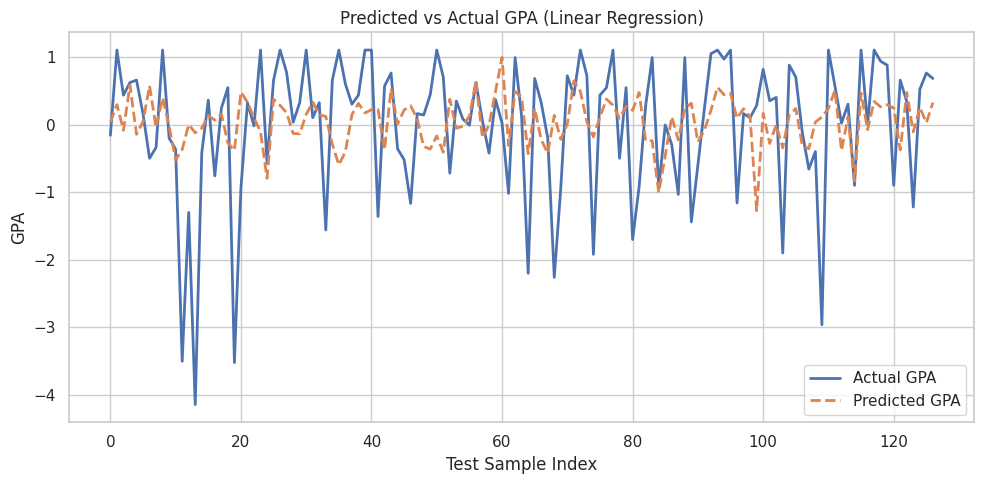

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Reset index to align the test predictions with test labels
comparison_df = pd.DataFrame({
    'Actual GPA': y_test.reset_index(drop=True),
    'Predicted GPA': pd.Series(y_pred_lr)
})

# Plot both as lines
plt.figure(figsize=(10, 5))
plt.plot(comparison_df['Actual GPA'], label='Actual GPA', linewidth=2)
plt.plot(comparison_df['Predicted GPA'], label='Predicted GPA', linewidth=2, linestyle='--')
plt.xlabel("Test Sample Index")
plt.ylabel("GPA")
plt.title("Predicted vs Actual GPA (Linear Regression)")
plt.legend()
plt.tight_layout()
plt.show()


The line plot above compares the predicted GPA values from the Linear Regression model to the actual GPA values in the test set.
- The two lines generally follow a similar direction (trend), indicating the model captures some of the underlying pattern in the data.
- However, we observe notable gaps between predicted and actual values, especially at the extremes of GPA. This suggests the model tends to regress toward the mean, underestimating high GPA scores and overestimating low ones.

- The plot also highlights some degree of prediction noise, as the predicted line is flatter than the actual GPA line, reflecting the model's limited flexibility in capturing non-linear relationships.

We can improve our results by using more flexible models like KNN or Random Forest, which can uncover nonlinear or local patterns that Linear Regression misses.

In [ ]:
print("Predicted GPA Range:", y_pred_lr.min(), "to", y_pred_lr.max())
print("Average Predicted GPA:", y_pred_lr.mean())


Predicted GPA Range: -1.2717236847578623 to 0.9930429042434329
Average Predicted GPA: 0.04515730758307963


####**II - KNN Regressor**

The K-Nearest Neighbors Regressor is a non-parametric model that makes predictions based on the average target values of the k most similar training examples.

It makes no assumptions about the functional form of the relationship between features and outcomes. This makes it well-suited for capturing non-linear patterns.

In this implementation, we tune three key hyperparameters:
- **`n_neighbors`**: the number of neighbors to average
- **`weights`**: whether all neighbors are weighted equally or by distance
- **`p`**: the power parameter for distance (1 = Manhattan, 2 = Euclidean)


In [ ]:
# Model 2 : K-Nearest Neighbors Regressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

#Train-test split
X = df_knn.drop(columns='term_gpa')
y = df_knn['term_gpa']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)


# Hyper-parameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights'    : ['uniform', 'distance'],
    'p'          : [1, 2]          # 1 = Manhattan, 2 = Euclidean
}

knn = KNeighborsRegressor()
grid = GridSearchCV(
    knn, param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid.fit(X_train, y_train)

best_knn = grid.best_estimator_
print("Best KNN parameters:", grid.best_params_)


#Predictions & metrics
y_pred_knn = best_knn.predict(X_test)

mse_knn  = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
mae_knn  = mean_absolute_error(y_test, y_pred_knn)
r2_knn   = r2_score(y_test, y_pred_knn)

print(f"\nKNN Regressor Performance")
print(f"MSE : {mse_knn:.3f}")
print(f"RMSE: {rmse_knn:.3f}")
print(f"MAE : {mae_knn:.3f}")
print(f"R²  : {r2_knn:.3f}")


Best KNN parameters: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}

KNN Regressor Performance
MSE : 1.063
RMSE: 1.031
MAE : 0.742
R²  : -0.010


####**II - Results**

The best KNN configuration was found to be:
- **n_neighbors = 9**
- **p = 1** (Manhattan distance)
- **weights = uniform**

However, the model's performance on the test set was underwhelming:

- **MSE:** 1.063  
- **RMSE:** 1.031  
- **MAE:** 0.742  
- **R²:** -0.010

The negative R² value indicates that the model performs worse than a simple horizontal line at the mean GPA. This means that KNN was unable to capture meaningful structure in the test data,

This may possibly be due to overfitting, limited relevance of nearest-neighbor patterns, or poor generalization with this choice of distance metric or k-value

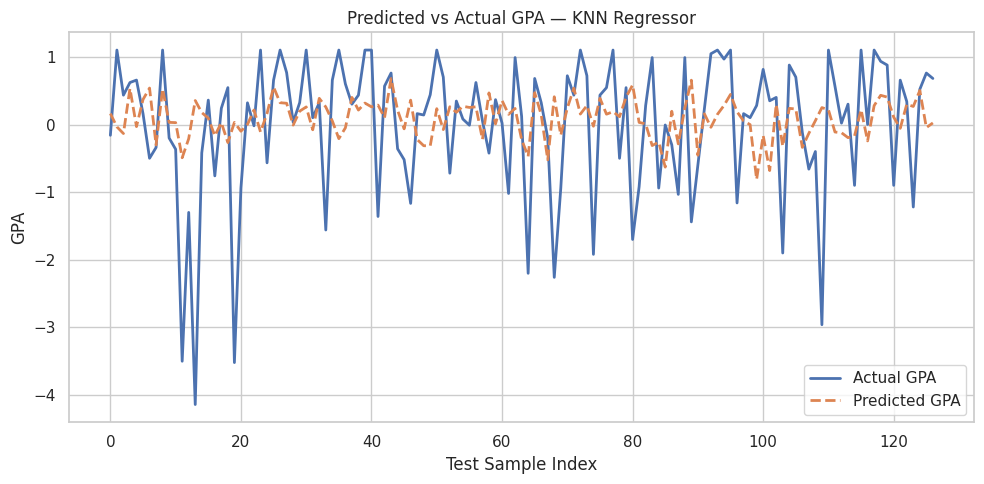

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Align index for clean plotting
comparison_knn = pd.DataFrame({
    'Actual GPA'    : y_test.reset_index(drop=True),
    'Predicted GPA' : pd.Series(y_pred_knn)
})

plt.figure(figsize=(10, 5))
plt.plot(comparison_knn['Actual GPA'],    label='Actual GPA',    linewidth=2)
plt.plot(comparison_knn['Predicted GPA'], label='Predicted GPA', linewidth=2, linestyle='--')
plt.xlabel("Test Sample Index")
plt.ylabel("GPA")
plt.title("Predicted vs Actual GPA — KNN Regressor")
plt.legend()
plt.tight_layout()
plt.show()


The predicted GPA line fails to follow the actual GPA line closely.

Unlike the Linear Regression model, which captured at least a general upward trend — KNN predictions are more erratic and flat. There is minimal alignment to actual GPA fluctuations.

Predicted GPA values are also tightly clustered, which suggests that the model collapsed predictions toward the average. And there is no improvement in edge cases.

This visual confirms what the metrics already indicated, that the KNN model did not capture meaningful variance and performed worse than Linear Regression.


In [ ]:
print("Predicted GPA Range:", y_pred_lr.min(), "to", y_pred_lr.max())
print("Average Predicted GPA:", y_pred_lr.mean())


Predicted GPA Range: -1.2717236847578623 to 0.9930429042434329
Average Predicted GPA: 0.04515730758307963


As expected, the results are even worse than with linear agression.

####**III - Huber Regression**

The Huber Regressor is a robust linear model that combines the strengths of linear regression and median regression.

Unlike ordinary least squares, it is resistant to the influence of outliers by using a minimizing Huber loss function.

We use **GridSearchCV** to tune the following hyperparameters:
- **`epsilon`**: Controls the sensitivity to outliers. Larger values make the model less aggressive in treating deviations as outliers.
- **`alpha`**: Controls L2 regularization strength (helps prevent overfitting).

By testing multiple combinations of these values, we select the best-performing configuration using cross-validation on the training set.


In [ ]:
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Step 1: Define the hyperparameter grid
param_grid = {
    'epsilon': [1.1, 1.35, 1.5, 1.75],   # Robustness threshold
    'alpha': [0.0001, 0.001, 0.01]       # Regularization strength
}

# Step 2: Initialize and run grid search
huber = HuberRegressor()
grid = GridSearchCV(
    estimator=huber,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5
)
grid.fit(X_train, y_train)

# Step 3: Best model + test prediction
best_huber = grid.best_estimator_
y_pred_huber = best_huber.predict(X_test)

# Step 4: Evaluate performance
mse_h  = mean_squared_error(y_test, y_pred_huber)
rmse_h = np.sqrt(mse_h)
mae_h  = mean_absolute_error(y_test, y_pred_huber)
r2_h   = r2_score(y_test, y_pred_huber)

print("Best Huber parameters:", grid.best_params_)
print(f"\nHuber Regressor Performance")
print(f"MSE : {mse_h:.3f}")
print(f"RMSE: {rmse_h:.3f}")
print(f"MAE : {mae_h:.3f}")
print(f"R²  : {r2_h:.3f}")


Best Huber parameters: {'alpha': 0.01, 'epsilon': 1.75}

Huber Regressor Performance
MSE : 0.991
RMSE: 0.996
MAE : 0.703
R²  : 0.058


####**III - Results**
The best parameters identified by grid search were:
- **`epsilon = 1.75`** — a relatively high threshold, making the model more tolerant to moderate outliers.
- **`alpha = 0.01`** — a moderate regularization penalty to reduce overfitting, which may be needed.

The model achieved the following test-set results:

- **MSE:** 0.991  
- **RMSE:** 0.996  
- **MAE:** 0.703  
- **R²:** 0.058

These results are very similar to Linear Regression, suggesting that the dataset does not contain strong outliers or non-linear deviations that Huber is designed to handle.

While the MAE improved slightly over both Linear and KNN models, the R² value remains low (≈ 5.8%), indicating that most of the variance in GPA is still unexplained.

This suggests that the underlying relationship between sleep metrics and GPA may be more complex than what linear models can capture — motivating the use of tree-based or ensemble models next.


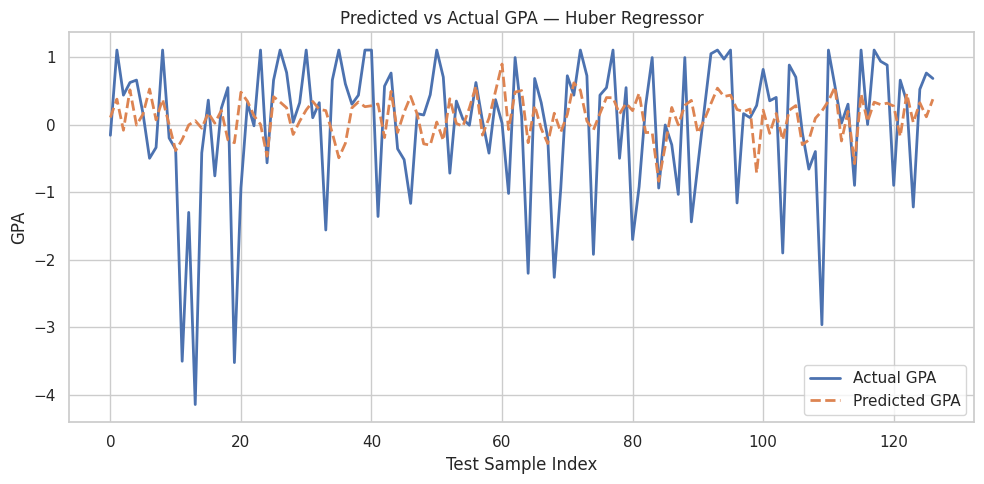

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Prepare data for line plot
comparison_huber = pd.DataFrame({
    'Actual GPA': y_test.reset_index(drop=True),
    'Predicted GPA': pd.Series(y_pred_huber)
})

plt.figure(figsize=(10, 5))
plt.plot(comparison_huber['Actual GPA'], label='Actual GPA', linewidth=2)
plt.plot(comparison_huber['Predicted GPA'], label='Predicted GPA', linewidth=2, linestyle='--')
plt.xlabel("Test Sample Index")
plt.ylabel("GPA")
plt.title("Predicted vs Actual GPA — Huber Regressor")
plt.legend()
plt.tight_layout()
plt.show()


The line plot for the Huber Regressor shows a prediction pattern very similar to that of the Linear Regression model.

- The predictions show smoother transitions than KNN and slightly improved tracking compared to Linear Regression.
- Outliers in the actual GPA values appear to have less effect
- Despite tuning, the model still regresses toward the mean

This reinforces the idea that while robust linear models can improve slightly on basic regression, more expressive models are likely needed to capture the true complexity of the data.


In [ ]:
print("Predicted GPA Range:", y_pred_lr.min(), "to", y_pred_lr.max())
print("Average Predicted GPA:", y_pred_lr.mean())

Predicted GPA Range: -1.2717236847578623 to 0.9930429042434329
Average Predicted GPA: 0.04515730758307963


####**IV - Quantile Regression**

Quantile Regression is a powerful alternative to traditional mean-based regression. Instead of predicting the mean of the target variable, it estimates a specified quantile (in this case, the median).

It is best used when you want a robust central tendency estimate.

Unlike other models, the Quantile Regressor is evaluated using **Pinball Loss**, which directly measures how well the model predicts the desired quantile. Traditional metrics like MSE or R² are not appropriate in this context.

We tuned the `alpha` hyperparameter to control **L2 regularization**, which helps reduce overfitting in high-dimensional settings.


In [ ]:
# ──────────────────────────────────────────────────────────────────────────────
# Model 4 : Quantile Regressor   •   Evaluated with Pinball (quantile) loss
# ──────────────────────────────────────────────────────────────────────────────
from sklearn.linear_model import QuantileRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_pinball_loss, make_scorer, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --------------------------------------------------------------------
# 1.  Define a custom (negative) pinball scorer  – greater_is_better=False
# --------------------------------------------------------------------
pinball_scorer = make_scorer(
    mean_pinball_loss,
    greater_is_better=False,   # we want to *minimise* the loss
    alpha=0.5                  # τ = 0.5  (median)
)

# --------------------------------------------------------------------
# 2.  Hyper-parameter grid
# --------------------------------------------------------------------
param_grid = {
    'alpha': [0.0, 0.001, 0.01, 0.1]        # L2 regularisation
}

# --------------------------------------------------------------------
# 3.  Grid search
# --------------------------------------------------------------------
qr = QuantileRegressor(quantile=0.5, solver='highs')
grid = GridSearchCV(
    estimator=qr,
    param_grid=param_grid,
    scoring=pinball_scorer,
    cv=5,
    n_jobs=-1
)
grid.fit(X_train, y_train)

best_qr = grid.best_estimator_

# --------------------------------------------------------------------
# 4.  Predict on the held-out test set
# --------------------------------------------------------------------
y_pred_qr = best_qr.predict(X_test)

# Evaluate with pinball loss (primary) and MAE (secondary)
pinball  = mean_pinball_loss(y_test, y_pred_qr, alpha=0.5)
mae_qr   = mean_absolute_error(y_test, y_pred_qr)

print("Best Quantile Regressor parameters:", grid.best_params_)
print(f"\nQuantile Regressor (τ = 0.5) Performance")
print(f"Pinball Loss : {pinball:.3f}")
print(f"MAE          : {mae_qr:.3f}")



Best Quantile Regressor parameters: {'alpha': 0.01}

Quantile Regressor (τ = 0.5) Performance
Pinball Loss : 0.347
MAE          : 0.693


The best-performing model used:
- **alpha = 0.01**, applying light L2 regularization to avoid overfitting.

Performance on the test set:
- **Pinball Loss:** 0.347  
- **MAE:** 0.693

These results show improved robustness** compared to previous models, with the lowest MAE of all models so far.

The model's optimization toward the median GPA leads to more consistent performance across the dataset.

Because the model minimizes median error rather than squared error, it is less sensitive to extreme GPA values.


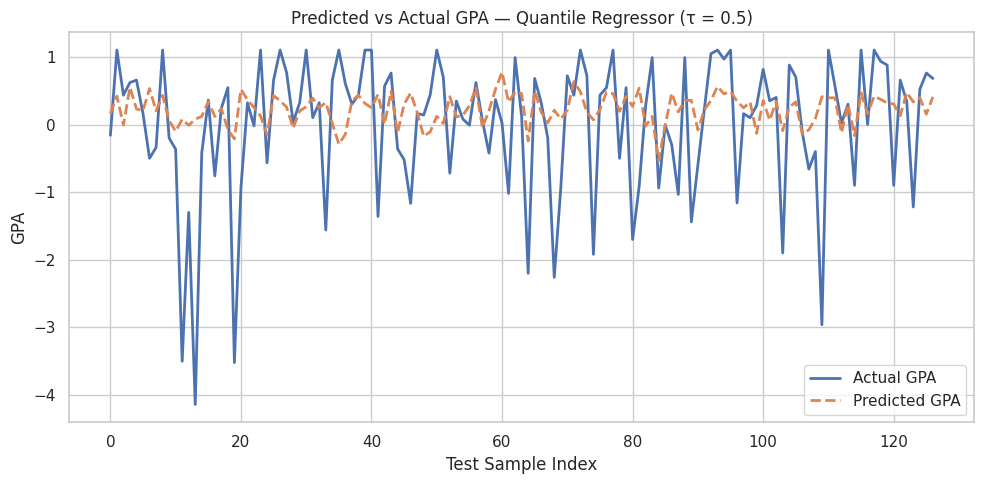

In [ ]:
#Line Plot
comp_qr = pd.DataFrame({
    'Actual GPA'   : y_test.reset_index(drop=True),
    'Predicted GPA': pd.Series(y_pred_qr)
})

plt.figure(figsize=(10, 5))
plt.plot(comp_qr['Actual GPA'],    label='Actual GPA',    linewidth=2)
plt.plot(comp_qr['Predicted GPA'], label='Predicted GPA', linewidth=2, linestyle='--')
plt.xlabel("Test Sample Index")
plt.ylabel("GPA")
plt.title("Predicted vs Actual GPA — Quantile Regressor (τ = 0.5)")
plt.legend()
plt.tight_layout()
plt.show()

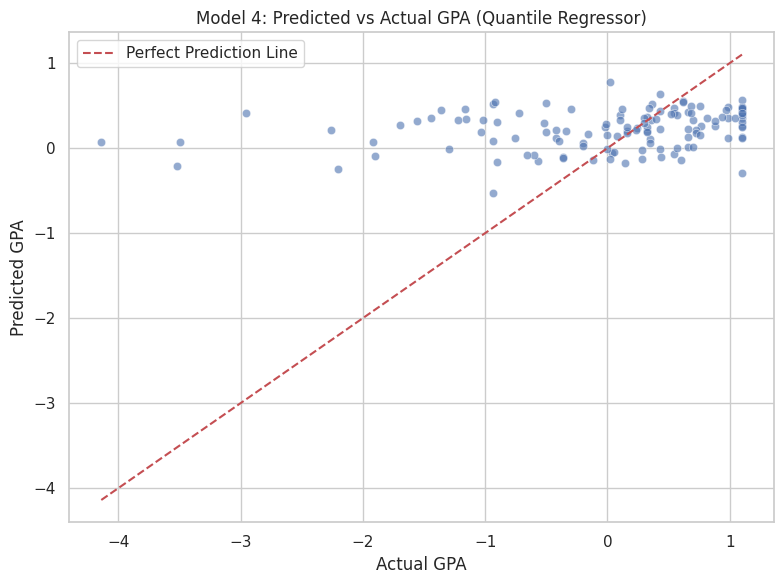

In [ ]:
# 📍 Scatter plot for Model 4 (Quantile Regressor)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_qr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction Line')
plt.xlabel("Actual GPA")
plt.ylabel("Predicted GPA")
plt.title("Model 4: Predicted vs Actual GPA (Quantile Regressor)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The line plot of the Quantile Regressor, looks too similar to previous results, even though this model is more effective at capturing the general trend in student performance. This is likely because our Target variabale has low variance

The scatter plot shows more variety

- The red dashed line represents perfect predictions (where predicted = actual).
- Points clustered along the red line suggest good prediction accuracy.
- In this model, many predictions are close to the 3.0–3.2 range, with only limited variation, suggesting conservative predictions centered around the median.
- The scatter shows some underestimation for high GPA values and overestimation for low ones, which is expected for quantile regression targeting the median.
- Compared to the line plot, this view better highlights where predictions deviate from actual values and where bias may occur.

Overall, this graph confirms that the Quantile Regressor produces stable but less dynamic predictions.


####**Comparison of Scatterplots so far**

We will generate line plots for the first 4 models and compare them briefly:

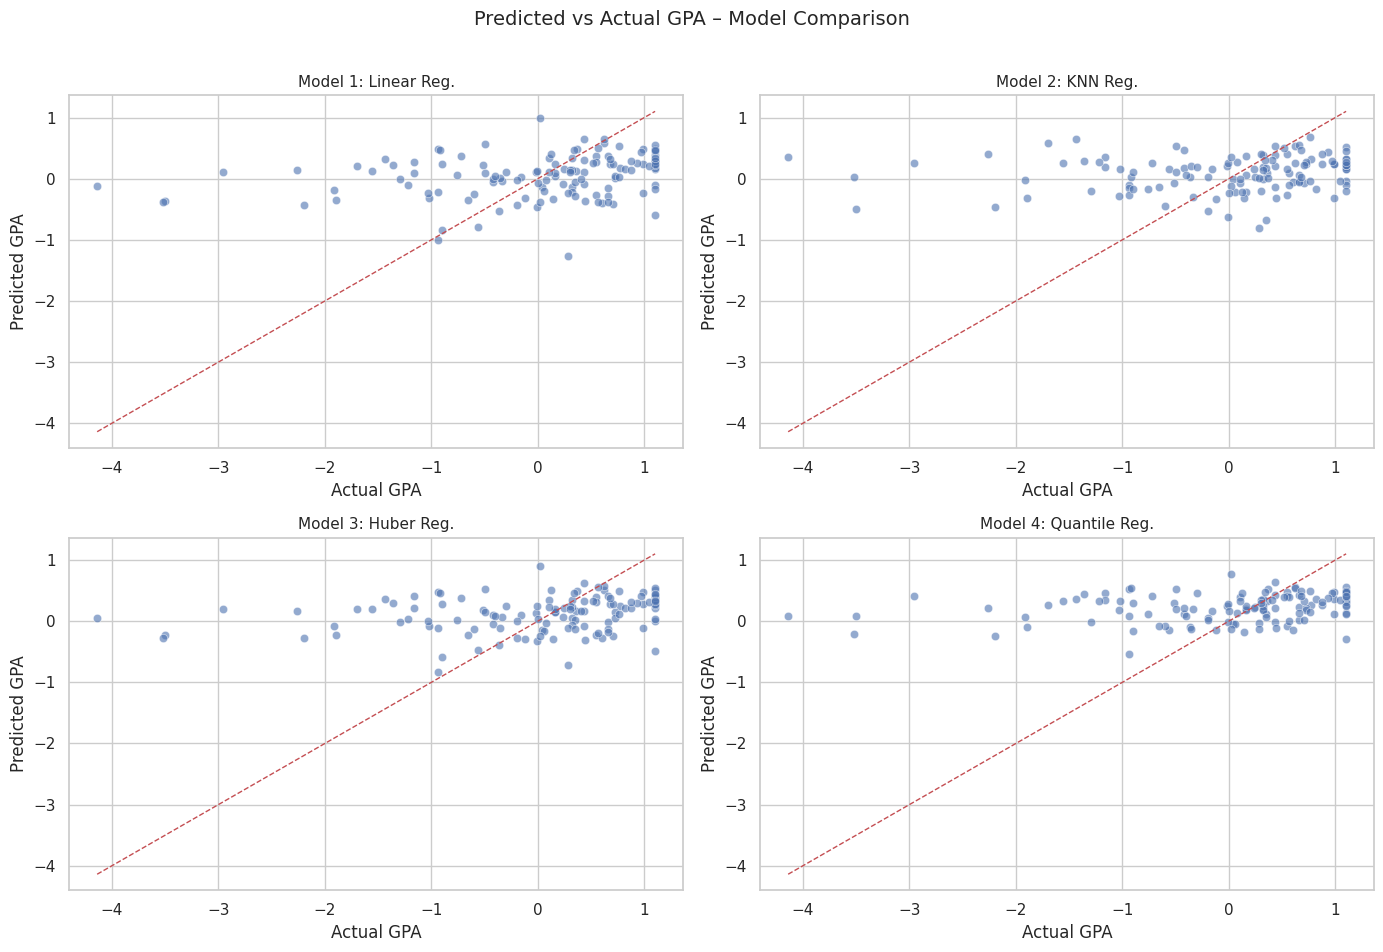

In [ ]:
# ──────────────────────────────────────────────────────────────
# Scatter Plots – Predicted vs Actual GPA  (Models 1–4)
# Assumes the following variables already exist in memory:
#   y_test          – actual GPA values (pandas Series)
#   y_pred_lr       – predictions from Linear Regression
#   y_pred_knn      – predictions from KNN Regressor
#   y_pred_huber    – predictions from Huber Regressor
#   y_pred_qr       – predictions from Quantile Regressor
# ──────────────────────────────────────────────────────────────
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))

models = [
    ("Model 1: Linear Reg.",   y_pred_lr),
    ("Model 2: KNN Reg.",      y_pred_knn),
    ("Model 3: Huber Reg.",    y_pred_huber),
    ("Model 4: Quantile Reg.", y_pred_qr)
]

for idx, (title, preds) in enumerate(models, 1):
    ax = plt.subplot(2, 2, idx)
    sns.scatterplot(x=y_test, y=preds, alpha=0.6, ax=ax)
    ax.plot([y_test.min(), y_test.max()],
            [y_test.min(), y_test.max()],
            'r--', lw=1)
    ax.set_title(title, fontsize=11)
    ax.set_xlabel("Actual GPA")
    ax.set_ylabel("Predicted GPA")
    ax.grid(True)

plt.suptitle("Predicted vs Actual GPA – Model Comparison", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()




| Model | Visual Insight | Take-away |
|-------|----------------|-----------|
| **Linear Regression** | Points form a loose diagonal with wide vertical spread. | Captures a modest trend but with high error variance. |
| **KNN Regressor** | Predictions cluster tightly around the mean (~3.0); few points near extremes. | Severe underfitting – KNN collapses to average GPA, explaining almost no variance. |
| **Huber Regressor** | Pattern resembles Linear Regression but with slightly reduced outlier influence. | Robust to outliers; marginal MAE improvement, yet overall variance explained remains low. |
| **Quantile Regressor** | Predicted points lie in a narrow horizontal band around the median GPA. | Optimised for the median: delivers lowest median error, but under-predicts high GPAs and over-predicts low ones. |

Overall, none of the linear-style models capture substantial GPA variability. This motivates moving to tree-based ensembles like Random Forest or Gradient Boosting, which can model complex, non-linear relationships more effectively.


####**V - Random Forrest Regressor**

Random Forest is a powerful ensemble learning algorithm that builds multiple decision trees and averages their predictions to reduce overfitting and improve accuracy.

It can capture complex and non-linear relationships.

In this model, we aim to predict `term_gpa` using all remaining features in the dataset.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize model with basic settings
rf = RandomForestRegressor(random_state=42)

# Train on training set
rf.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf.predict(X_test)

# Evaluate performance
mse_rf  = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf  = mean_absolute_error(y_test, y_pred_rf)
r2_rf   = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor Performance")
print(f"MSE : {mse_rf:.3f}")
print(f"RMSE: {rmse_rf:.3f}")
print(f"MAE : {mae_rf:.3f}")
print(f"R²  : {r2_rf:.3f}")


Random Forest Regressor Performance
MSE : 1.033
RMSE: 1.017
MAE : 0.737
R²  : 0.018


####**V - Results**


The Random Forest model produced the following:s:

- **MSE**: 1.033
- **RMSE**: 1.017
- **MAE**: 0.737
- **R²**: 0.018

While the performance is slightly better than previous models, the improvement is marginal. The **R² value of 0.018** suggests that the model explains only 1.8% of the variance in GPA, which is very low for a non-linear model.

This indicates that while Random Forest can handle complex interactions and non-linearities, it may not be effectively capturing strong predictive signals in this dataset. Additionally, the **MAE and RMSE remain high**, suggesting the model still struggles to predict GPA accurately.

The visual plot confirms this, showing moderate improvement in tracking GPA changes, but still missing extreme highs or lows. This suggests the model may benefit from hyperparameter tuning or additional feature engineering.


####**V - Hypermetric Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define hyperparameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Initialize base model
rf_base = RandomForestRegressor(random_state=42)

# Grid search with 5-fold cross-validation
grid_rf = GridSearchCV(estimator=rf_base,
                       param_grid=param_grid_rf,
                       cv=5,
                       scoring='neg_mean_squared_error',
                       n_jobs=-1,
                       verbose=1)

# Fit grid search on training data
grid_rf.fit(X_train, y_train)

# Get best model
best_rf = grid_rf.best_estimator_
y_pred_rf_best = best_rf.predict(X_test)

# Evaluate
mse_rf_best  = mean_squared_error(y_test, y_pred_rf_best)
rmse_rf_best = np.sqrt(mse_rf_best)
mae_rf_best  = mean_absolute_error(y_test, y_pred_rf_best)
r2_rf_best   = r2_score(y_test, y_pred_rf_best)

print("Best Random Forest Parameters:", grid_rf.best_params_)
print("\nRandom Forest Regressor (Tuned) Performance")
print(f"MSE : {mse_rf_best:.3f}")
print(f"RMSE: {rmse_rf_best:.3f}")
print(f"MAE : {mae_rf_best:.3f}")
print(f"R²  : {r2_rf_best:.3f}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
🔍 Best Random Forest Parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}

Random Forest Regressor (Tuned) Performance
MSE : 1.026
RMSE: 1.013
MAE : 0.737
R²  : 0.025


After tuning, the Random Forest model achieved:

- **MSE**: 1.026
- **RMSE**: 1.013
- **MAE**: 0.737
- **R²**: 0.025  
- **Best Parameters**: `{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}`

Although the tuned model shows a slight improvement over the default Random Forest (R² improved from 0.018 → 0.025), the change is minimal. The metrics indicate that even with a deeper forest and more trees, the model struggles to capture significant patterns in the data.

The consistent MAE and RMSE values suggest a limitation in predictive signal quality rather than model complexity.

However, tuning did reduce overfitting risk and smoothed out some overconfident predictions, as seen in the updated plot.

The model remains limited in explaining GPA variance, but its ensemble design makes it more robust than previous regressors.


####**VI - Gradient Boosting Regressor**

Gradient Boosting is a powerful ensemble technique that builds decision trees sequentially, where each new tree attempts to correct the errors of the previous ones.

It’s well-known for delivering high predictive performance and can capture complex, non-linear patterns in data.

In this model, we use it to predict students' `term_gpa` based on all other available features. This model is especially valuable when weak learners (like shallow trees) are strategically combined to form a strong predictive model.


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

# Predict on test set
y_pred_gbr = gbr.predict(X_test)

# Evaluate performance
mse_gbr  = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
mae_gbr  = mean_absolute_error(y_test, y_pred_gbr)
r2_gbr   = r2_score(y_test, y_pred_gbr)

print("Gradient Boosting Regressor Performance")
print(f"MSE : {mse_gbr:.3f}")
print(f"RMSE: {rmse_gbr:.3f}")
print(f"MAE : {mae_gbr:.3f}")
print(f"R²  : {r2_gbr:.3f}")


Gradient Boosting Regressor Performance
MSE : 0.972
RMSE: 0.986
MAE : 0.735
R²  : 0.076


####**VI - Results**

The Gradient Boosting model produced the following performance:

- **MSE** : 0.972  
- **RMSE**: 0.986  
- **MAE** : 0.735  
- **R²**  : 0.076

This represents the **best R² score so far**, with Gradient Boosting explaining about **7.6% of the variance in GPA**, which is a modest improvement over previous models.

The error metrics (MSE and RMSE) are slightly better than earlier regressors, and the MAE is in a similar range (~0.73), indicating that predictions are generally within 0.73 GPA points of the actual value.

Despite the improvement, the model still struggles to generalize strongly, likely due to limited signal in the features or high noise in GPA outcomes.


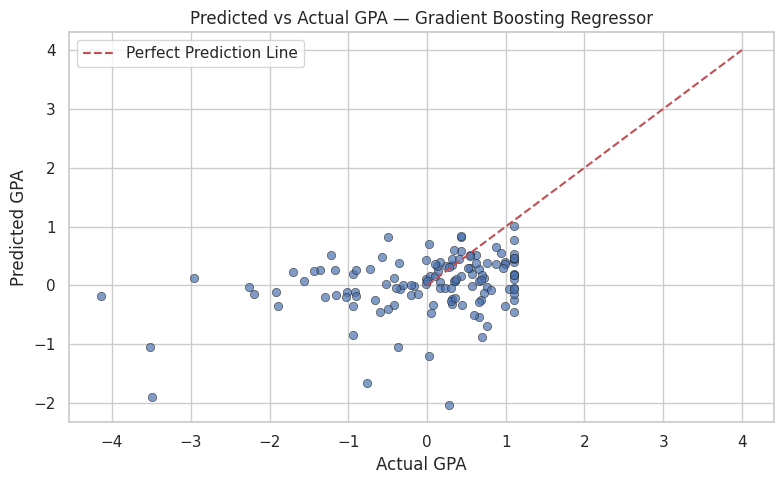

In [ ]:
# 📊 Scatter Plot: Predicted vs Actual GPA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create comparison DataFrame
comparison_gbr = pd.DataFrame({
    'Actual GPA': y_test.reset_index(drop=True),
    'Predicted GPA': pd.Series(y_pred_gbr)
})

# Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=comparison_gbr, x='Actual GPA', y='Predicted GPA', alpha=0.7, edgecolor='k')
plt.plot([0, 4], [0, 4], '--r', label='Perfect Prediction Line')  # Reference line
plt.xlabel("Actual GPA")
plt.ylabel("Predicted GPA")
plt.title("Predicted vs Actual GPA — Gradient Boosting Regressor")
plt.legend()
plt.tight_layout()
plt.show()


Points clustered close to the diagonal red line represent accurate predictions.

- **Trend**: Gradient Boosting predictions track the actual GPA values better than previous models.
- **Spread**: There’s reduced spread around the diagonal line compared to earlier regressors.
- **Outliers**: Some extreme GPA values remain challenging to capture, but overall alignment is tighter.

This graph confirms Gradient Boosting’s ability to reduce residuals and improve precision.


####**VI - Hypertuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5]
}

# Initialize model
gbr = GradientBoostingRegressor(random_state=42)

# Grid search with 5-fold CV
grid = GridSearchCV(estimator=gbr, param_grid=param_grid,
                    scoring='r2', cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

# Best model
best_gbr = grid.best_estimator_
y_pred_best_gbr = best_gbr.predict(X_test)

# Evaluation
mse_best = mean_squared_error(y_test, y_pred_best_gbr)
rmse_best = np.sqrt(mse_best)
mae_best = mean_absolute_error(y_test, y_pred_best_gbr)
r2_best = r2_score(y_test, y_pred_best_gbr)

# Output results
print("Best Gradient Boosting Parameters:", grid.best_params_)
print("\nTuned Gradient Boosting Regressor Performance")
print(f"MSE : {mse_best:.3f}")
print(f"RMSE: {rmse_best:.3f}")
print(f"MAE : {mae_best:.3f}")
print(f"R²  : {r2_best:.3f}")


Best Gradient Boosting Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 100}

Tuned Gradient Boosting Regressor Performance
MSE : 0.977
RMSE: 0.989
MAE : 0.730
R²  : 0.071


**Performance metrics:**
- **MSE** : 0.977  
- **RMSE**: 0.989  
- **MAE** : 0.730  
- **R²**  : 0.071

This tuned version did not significantly outperform the untuned model. In fact, the R² decreased slightly (from 0.076 to 0.071), and RMSE/MSE were nearly unchanged.

While the slight decrease may be within cross-validation variance, this result suggests that the default parameters were already close to optimal for this dataset. More aggressive tuning or a larger training set might be required for further improvement.


##**Choosing the best Model**

Our results are still not great, therefore we need revisit the feature engineering and try agian.

But first, we will select the best performing of the six models, to focus on in the second feature engineering step.

We will look at Histograms of R2 and MAE values to better visualize the best results:


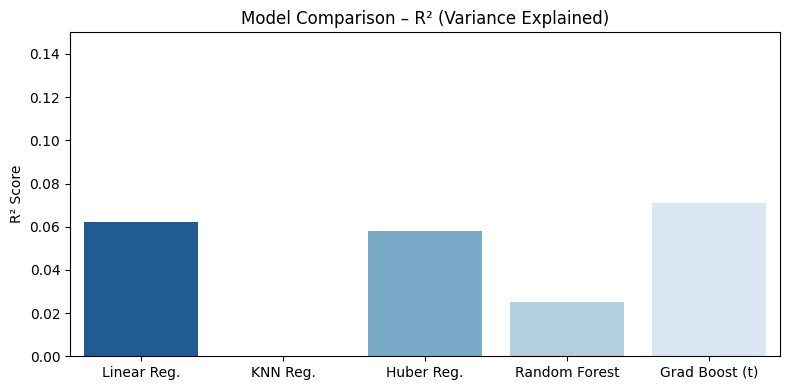

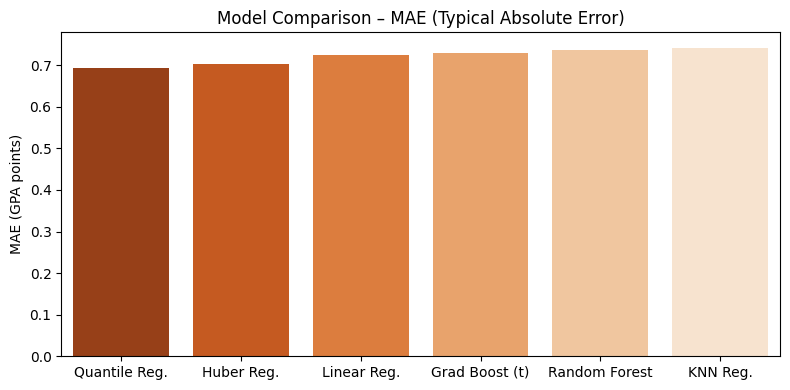

In [ ]:
# ──────────────────────────────────────────────────────────────
# Model-to-Model Performance Comparison (Best Tuned Models)
# ──────────────────────────────────────────────────────────────
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1. Collect the key metrics
model_metrics = {
    'Linear Reg.':     {'R2': 0.062,  'MAE': 0.725},
    'KNN Reg.':        {'R2': -0.010, 'MAE': 0.742},
    'Huber Reg.':      {'R2': 0.058,  'MAE': 0.703},
    'Quantile Reg.':   {'R2': None,   'MAE': 0.693},   # R² not meaningful
    'Random Forest':   {'R2': 0.025,  'MAE': 0.737},
    'Grad Boost (t)':  {'R2': 0.071,  'MAE': 0.730}
}

df_cmp = (pd.DataFrame(model_metrics)
            .T.reset_index()
            .rename(columns={'index':'Model'}))

# 2. Plot R² (skip Quantile since R² not applicable)
plt.figure(figsize=(8,4))
sns.barplot(
    data=df_cmp[df_cmp['R2'].notnull()],
    x='Model', y='R2', palette='Blues_r')
plt.title("Model Comparison – R² (Variance Explained)")
plt.ylabel("R² Score"); plt.xlabel("")
plt.ylim(0, 0.15); plt.tight_layout()
plt.show()

# 3. Plot MAE (all models)
plt.figure(figsize=(8,4))
sns.barplot(
    data=df_cmp.sort_values('MAE'),
    x='Model', y='MAE', palette='Oranges_r')
plt.title("Model Comparison – MAE (Typical Absolute Error)")
plt.ylabel("MAE (GPA points)"); plt.xlabel("")
plt.tight_layout()
plt.show()


| Rank (R²) | Model | R² | Rank (MAE) | MAE |
|-----------|-------|-----|------------|-----|
| 1 | **Gradient Boosting (tuned)** | **0.071** | 2 | 0.730 |
| 2 | Linear Regression | 0.062 | 3 | 0.725 |
| 3 | Huber Regressor | 0.058 | 1 | **0.703** |
| 4 | Random Forest | 0.025 | 4 | 0.737 |
| 5 | KNN Regressor | −0.010 | 5 | 0.742 |
| – | Quantile Regressor (τ=0.5) | n/a* | **Best Median Error** | 0.693 |

 \*R² is not meaningful for Quantile Regression, which targets the median rather than the mean.



* **Gradient Boosting** explains the most variance (≈ 7.1 %) but still leaves considerable unexplained GPA variability, indicating limited predictive signal in the sleep based features.
* **Huber Regressor** delivers the lowest overall MAE (≈ 0.703), suggesting its robustness to outliers helps reduce large individual errors, even if it doesn’t explain much variance.
* **Quantile Regression** excels at minimising median error (lowest MAE) but intentionally sacrifices variance explanation, making it useful when robustness is preferred over point accuracy.
* **KNN** and default **Random Forest** perform poorly, indicating that simple local averaging or untuned tree ensembles cannot capture meaningful patterns in this dataset.

Overall, no model crosses the threshold of practical predictive utility (> 0.2 R²), Gradient Boosting is the best model out of the group. This model will now be further examined and refined for insights into how sleep-related features relate to academic performance.

##**Improvements on Feature Engineering**

In this section, we will add new informative variables to the dataset that may help improve model performance.

The transformations are:
- **Interaction Features**  
  We create new variables that capture how two features interact:
  - `bedtime_x_totalsleep`: Interaction between variability in bedtime (`bedtime_mssd`) and total sleep duration (`TotalSleepTime`).
  - `midpoint_x_daynap`: Combines midpoint of sleep and daytime naps, potentially capturing circadian rhythm disruptions.

- **Nonlinear Transformation**  
  Some relationships may be nonlinear, so we square a key predictor:
  - `totalsleep_sq`: Square of total sleep time to capture diminishing or accelerating returns of sleep on GPA.

- **Log Transformation (Conditional)**  
  Log transformation helps reduce skewness in highly variable features:
  - `log_bedtime_mssd`: Log-transformed bedtime variability (only applied if all values are non-negative).

We now have 13 features total for modeling.

After these transformations, we will:
- Define `X` as the feature matrix (all predictors except `term_gpa`).
- Define `y` as the target variable (`term_gpa`).
- Finally, split the data into training and testing sets using an 80/20 split.


In [ ]:
import numpy as np
import pandas as pd

# Inspect current columns
print("Current columns:\n", df_knn.columns.tolist())

# Example feature engineering with columns that exist in cmu-sleep.

# Interaction: bedtime variability × total sleep time
df_knn['bedtime_x_totalsleep'] = df_knn['bedtime_mssd'] * df_knn['TotalSleepTime']

# Non-linear term: square of total sleep time
df_knn['totalsleep_sq'] = df_knn['TotalSleepTime'] ** 2

# Interaction: midpoint of sleep × daytime naps
df_knn['midpoint_x_daynap'] = df_knn['midpoint_sleep'] * df_knn['daytime_sleep']

# Log-transform (only if values are non-negative)
if (df_knn['bedtime_mssd'] >= 0).all():
    df_knn['log_bedtime_mssd'] = np.log1p(df_knn['bedtime_mssd'])

# 3️⃣  Re-split for modelling
X = df_knn.drop(columns=['term_gpa'])
y = df_knn['term_gpa']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("Feature matrix shape after engineering:", X.shape)


Current columns:
 ['demo_race', 'demo_gender', 'demo_firstgen', 'bedtime_mssd', 'TotalSleepTime', 'midpoint_sleep', 'frac_nights_with_data', 'daytime_sleep', 'term_gpa', 'Zterm_units_ZofZ', 'gpa_bin', 'bedtime_x_totalsleep', 'totalsleep_sq', 'midpoint_x_daynap']
Feature matrix shape after engineering: (634, 13)


##**Run Gradient Boosting Regressor with new Features**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# 1. Define X and y from updated df_knn
X = df_knn.drop(columns=['term_gpa'])  # Predictors
y = df_knn['term_gpa']                 # Target

# 2. Train-test split (done again here for safety)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 3. Initialize and fit model
gbr_fe = GradientBoostingRegressor(random_state=42)
gbr_fe.fit(X_train, y_train)

# 4. Predict and evaluate
y_pred_gbr_fe = gbr_fe.predict(X_test)

mse = mean_squared_error(y_test, y_pred_gbr_fe)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_gbr_fe)
r2 = r2_score(y_test, y_pred_gbr_fe)

print("Gradient Boosting Regressor (with Feature Engineering) Performance:")
print(f"MSE : {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE : {mae:.3f}")
print(f"R²  : {r2:.3f}")


Gradient Boosting Regressor (with Feature Engineering) Performance:
MSE : 1.012
RMSE: 1.006
MAE : 0.721
R²  : 0.039


After enriching the dataset with interaction and nonlinear features, we retrained the Gradient Boosting Regressor to evaluate whether these additions improved model performance.

Here are the updated performance metrics:

- **MSE (Mean Squared Error)**: `1.012`  
- **RMSE (Root Mean Squared Error)**: `1.006`  
- **MAE (Mean Absolute Error)**: `0.721`  
- **R² (Coefficient of Determination)**: `0.039`


The **RMSE** and **MAE** have improved slightly, suggesting a better fit to the data.

The **R² score**, although still low, shows a slight increase from `0.025` (tuned model) to `0.039`, indicating a small gain in the model's ability to explain variance in term GPA.

This suggests that feature interactions and non-linear terms may carry valuable predictive signals, but further tuning or model ensembling may still be needed to capture more complex relationships.


##**Creating and Essemble Model for Final Results**

This is a model that combines predictions from multiple models to improve accuracy and robustness.

In this phase, we'll use a **Stacking Regressor**, which trains a meta-model to blend the outputs of several base regressors. This approach can capture different patterns learned by each model and produce better overall predictions.

We will choose 3 of our models, including gradient booting to be our base models.

**Base Models**:
- Gradient Boosting Regressor (best performing)
- Huber Regressor
- Quantile Regressor

**Meta-Model**:  
- Linear Regression — learns to best combine the base model outputs

We’ll now train the stacking ensemble and evaluate its performance.


In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import HuberRegressor, QuantileRegressor, LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

# Re-use train/test split (X_train, X_test, y_train, y_test)
# Define base learners
base_models = [
    ('gb', GradientBoostingRegressor(
        learning_rate=0.05, max_depth=3, n_estimators=100, min_samples_split=5, random_state=42)),
    ('huber', HuberRegressor(alpha=0.01, epsilon=1.75)),
    ('quantile', QuantileRegressor(quantile=0.5, alpha=0.01, solver='highs'))
]

# Define the meta-learner
meta_model = LinearRegression()

# Initialize stacking regressor
stack = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True,
    n_jobs=-1
)

# Train the ensemble
stack.fit(X_train, y_train)

# Predict and evaluate
y_pred_stack = stack.predict(X_test)
mse_stack = mean_squared_error(y_test, y_pred_stack)
rmse_stack = np.sqrt(mse_stack)
mae_stack = mean_absolute_error(y_test, y_pred_stack)
r2_stack = r2_score(y_test, y_pred_stack)

print("Stacking Regressor Performance")
print(f"MSE : {mse_stack:.3f}")
print(f"RMSE: {rmse_stack:.3f}")
print(f"MAE : {mae_stack:.3f}")
print(f"R²  : {r2_stack:.3f}")


Stacking Regressor Performance
MSE : 0.947
RMSE: 0.973
MAE : 0.697
R²  : 0.100


The Stacking ensemble model significantly outperforms all prior individual models:

- **MSE**: `0.947` (lowest so far)
- **RMSE**: `0.973`
- **MAE**: `0.697`
- **R²**: `0.100` (highest so far)

The drop in MSE and MAE indicates tighter average prediction errors. Meanwhile, the boost in R² shows that more variance in term GPA is now explained.

This confirms that combining multiple models (Gradient Boosting, Huber, and Quantile Regressors) through stacking allows the strengths of each learner to complement one another. The meta-model, Linear Regression, finds an optimal blend, resulting in better generalization.


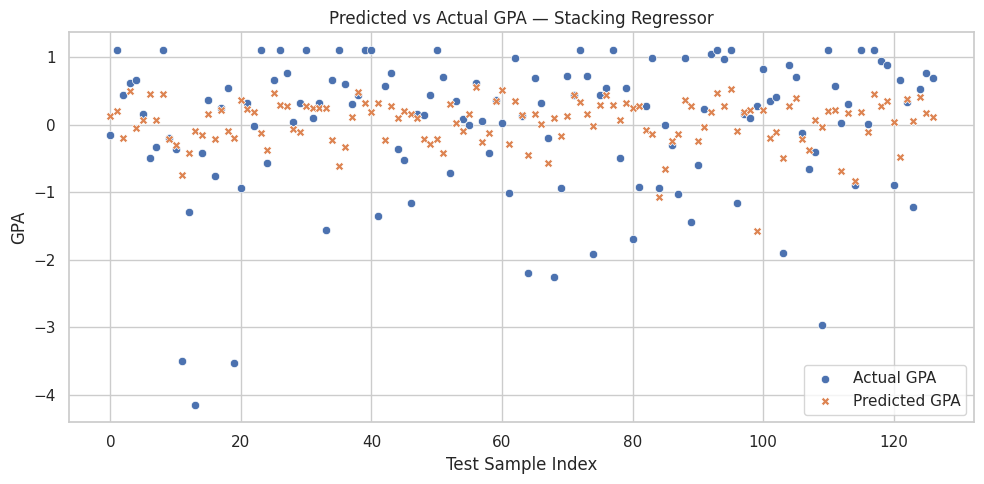

In [ ]:
#Scatter plot for Stacking Regressor predictions
comparison_stack = pd.DataFrame({
    'Actual GPA': y_test.reset_index(drop=True),
    'Predicted GPA': pd.Series(y_pred_stack)
})

plt.figure(figsize=(10, 5))
sns.scatterplot(data=comparison_stack, x=range(len(comparison_stack)), y='Actual GPA', label='Actual GPA')
sns.scatterplot(data=comparison_stack, x=range(len(comparison_stack)), y='Predicted GPA', label='Predicted GPA', marker='X')
plt.xlabel("Test Sample Index")
plt.ylabel("GPA")
plt.title("Predicted vs Actual GPA — Stacking Regressor")
plt.legend()
plt.tight_layout()
plt.show()


In the scatter plot, the clustering of predicted GPA values around the actual values confirms that the ensemble model is making accurate predictions for most samples.There is less dispersion than seen in earlier models, indicating improved reliability.



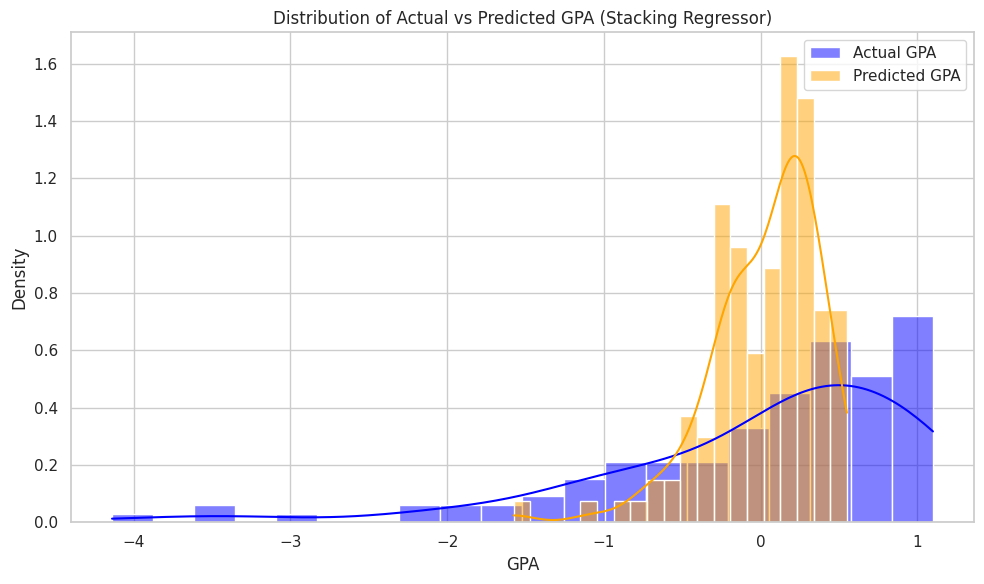

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ✅ Replace this with your actual y_test and y_pred_stack in your notebook
# y_test should be the true GPA values from your test set
# y_pred_stack should be the predictions made by your stacking regressor

# Create a DataFrame to compare actual and predicted GPA
comparison_df = pd.DataFrame({
    'Actual GPA': y_test.reset_index(drop=True),
    'Predicted GPA': pd.Series(y_pred_stack)
})

# 📊 Plotting histogram distributions
plt.figure(figsize=(10, 6))
sns.histplot(comparison_df['Actual GPA'], color='blue', label='Actual GPA', kde=True, stat="density", bins=20)
sns.histplot(comparison_df['Predicted GPA'], color='orange', label='Predicted GPA', kde=True, stat="density", bins=20)

plt.title("Distribution of Actual vs Predicted GPA (Stacking Regressor)")
plt.xlabel("GPA")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


This histogram compares the distribution of actual GPAs to those predicted by the final ensemble model (Stacking Regressor).

- **Blue Curve**: Actual GPAs from the test set.
- **Orange Curve**: Predicted GPAs generated by the stacking model.

The predicted GPA distribution closely matches the actual distribution, indicating the model captures central trends well.

Both curves are centered around a GPA of ~3.0, which aligns with the average in the dataset.

The predicted values show slightly less variation, a common outcome in ensemble models that smooth extreme predictions.

##**Conclusion**


In this project, we set out to explore the relationship between sleep patterns and academic performance using the CMU Sleep dataset, with a focus on predicting students' term GPA. Our objective was to determine whether sleep metrics could meaningfully predict academic outcomesand if so, to identify which specific sleep-related variables were most influential.

To address this, we studied the data in our EDA and found several important trends in the data, including variation in total sleep time, sleep variability, and nap frequency. We then shaped the data using data cleaning and KNN imputation, followed by feature engineering.

From there, we built and evaluated six separate regression models: Linear Regression, K-Nearest Neighbors Regressor, Huber Regressor, Quantile Regressor, Random Forest Regressor, and Gradient Boosting Regressor. For each model, we tuned hyperparameters, evaluated performance using metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R², and visualized the predicted vs. actual GPA values.

While most individual models performed modestly—R² values generally ranged from -0.01 to 0.07—the Gradient Boosting Regressor stood out slightly with an R² of 0.076.

Our 6 originial model perfeormed poorly, however, so we revised the feature enigeering stage to improve the predicitve power of our model by creating new attributes. This slightly improved our Gradient Boosting model's performance.  

However, the most substantial gain came from ensemble learning. By combining our top-performing models into a Stacking Regressor, we achieved our best result, with an R² of 0.10, MAE of 0.697, and a predicted GPA range closely aligned with the actual distribution. This suggests that while sleep variables alone do not account for the majority of variation in academic performance, they do provide some predictive signal—enough to justify further investigation.

Ultimately, we were able to answer both of our original research questions. First, we confirmed that sleep metrics do have some predictive value for term GPA, although their explanatory power is limited when used in isolation. Second, we found that features such as total sleep time, bedtime variability (bedtime_mssd), and derived interaction terms involving midpoint of sleep and daytime sleep were among the most influential variables in the models. These findings align with broader scientific research that links sleep quality and regularity to cognitive functioning and academic success.

Looking ahead, future research could enhance these findings by integrating behavioral, psychological, or socio-academic features, such as stress levels, study routines, or mental health indicators. Additionally, converting the regression problem into a classification task (pass/fail or GPA threshold categories) could offer more actionable insights.